# <center> <b>Machine Learning Concepts (6G7V0015)</b></center>

## <center><b>AutoTrader's Car Price Predictor v.1.00</b></center>

In order to address the main task of producing a regression model for price prediction, you need to implement and run the following tasks that are typical of a Machine Learning pipeline, using our usual environment (i.e., Python ecosystem/notebooks):

<b>1. Data/Domain Understanding and Exploration</b> (e.g., load the data, sample observations,
check correct parsing of data, identify quantitative and qualitative features, analyse data
distributions (e.g., range, centrality, dispersion, shape), identify good predictors, process the
data for visualisation and exploration).

<b>2. Data Processing for Machine Learning</b> (e.g., detect and deal with noise (i.e., erroneous
values), missing values, and outliers; subset, reshape, and engineer features for machine
learning purposes; categorically-encode, rescale data; split data into predictors and target;
obtain train/validation/test folds).

<b>3. Model Building</b> (e.g., choose suitable algorithm(s), fit and tune models; grid-search, rank,
and select model(s) on based on evaluation metrics and under/overfit trade-off).

<b>4. Model Evaluation and Analysis</b> (e.g., evaluate selected model(s) with score/loss metrics
with cross-validation, analyse actual vs predicted plot, gain and discuss insights based on
feature importance, analyse individual predictions and distribution of scores/losses together
with predictors; for an interpretable model, briefly discuss about its structure).

## <b>1. Data / Domain Understanding & Exploration</b>

In [1]:
# Importing warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Data Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Target Encoding
import category_encoders as ce

# Train-Test Split
from sklearn.model_selection import train_test_split

# Scaling the data
from sklearn.preprocessing import StandardScaler

# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

# Grid Search for KNN Regression
from sklearn.model_selection import GridSearchCV

# Cross Validation Score
from sklearn.model_selection import cross_val_score

# Mean Squared Error
from sklearn.metrics import mean_squared_error

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Visualizor via text
from sklearn.tree import export_text

# Decision Tree Regressor Plotter
from sklearn.tree import plot_tree

# Linear Regression
from sklearn.linear_model import LinearRegression

# Ridge Regression
from sklearn.linear_model import Ridge, Lasso

# Predicttion Error Plot
from yellowbrick.regressor import PredictionError

# Permutation Importance
from sklearn.inspection import permutation_importance

# Residuals Plot
from yellowbrick.regressor import ResidualsPlot

### <b>a. Load the Dataset</b>

In [2]:
# Importing the dataset
df = pd.read_csv('../Dataset/adverts.csv')

### <b>b. Sampling the Observations</b>

In [3]:
# Extracting the 5 top rows in the dataset
df.head(5)

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [4]:
# Extracting a random sample of the dataset
df.sample(5)

public_reference  mileage reg_code standard_colour  standard_make  \
132317   202010305620319     10.0      NaN            Grey     Volkswagen   
229086   202010064669759  37825.0       18            Blue           SEAT   
233232   202010104838782  33000.0       09          Silver         Toyota   
314810   202010024517938   1000.0       70            Grey  Mercedes-Benz   
23046    202009103545089  51531.0       67            Blue     Volkswagen   

       standard_model vehicle_condition  year_of_registration  price  \
132317         Tiguan               NEW                   NaN  34935   
229086           Leon              USED                2018.0   9995   
233232          Yaris              USED                2009.0   3989   
314810        C Class              USED                2020.0  52000   
23046            Polo              USED                2017.0   9088   

          body_type  crossover_car_and_van fuel_type  
132317          SUV                  False    Diesel  
229086    Hatchback                  False    Petrol  
233232    Hatchback                  False    Petrol  
314810  Convertible                  False    Petrol  
23046     Hatchback                  False    Petrol

In [5]:
# Extracting the last 5 rows of the dataset
df.tail(5)

public_reference   mileage reg_code standard_colour standard_make  \
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

       standard_model vehicle_condition  year_of_registration  price  \
402000            208              USED                2019.0  10595   
402001            107              USED                2009.0   2000   
402002        Qashqai              USED                2012.0   7250   
402003            595              USED                2015.0  11490   
402004       A4 Avant              USED                2014.0  20520   

        body_type  crossover_car_and_van fuel_type  
402000  Hatchback                  False    Petrol  
402001  Hatchback                  False    Petrol  
402002        SUV                  False    Petrol  
402003  Hatchback                  False    Petrol  
402004     Estate                  False    Diesel

In [6]:
# Checking for size and shape of the dataset
print("Size of the Dataset is: ", df.size)
print("Shape of the Dataset is: ", df.shape)

Size of the Dataset is:  4824060
Shape of the Dataset is:  (402005, 12)


<b> Observation(s):</b>

* No issue while importing the dataset and sampling the data.
* There are 402,005 rows in the dataset along with 12 columns / features.

### <b>c. Checking Correct Parsing of Data</b>

In [7]:
# Types of data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


<table>
    <thead>
        <tr>
            <th>Data Attribute</th>
            <th>Value</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Public Reference</td>
            <td>Date on which the advertisment was published</td>
        </tr>
        <tr>
            <td>Mileage</td>
            <td>Total mileage of the cars</td>
        </tr>
        <tr>
            <td>Reg Code</td>
            <td>Regisration code of the car</td>
        </tr>
        <tr>
            <td>Standard Colour</td>
            <td>Colour of the car</td>
        </tr>
        <tr>
            <td>Standard Make</td>
            <td>Make / Manufacturer of the car</td>
        </tr>
        <tr>
            <td>Standard Model</td>
            <td>Model of the car</td>
        </tr>
        <tr>
            <td>Vehicle Condition</td>
            <td>Condition of the car</td>
        </tr>
        <tr>
            <td>Year of Registration</td>
            <td>Year on which the vehicle was registered</td>
        </tr>
        <tr>
            <td>Price</td>
            <td>Quoted price of the car</td>
        </tr>
        <tr>
            <td>Body Type</td>
            <td>Body type of the car</td>
        </tr>
        <tr>
            <td>Crossover Car and Van</td>
            <td>whether it is a crossover b/w car and van or not</td>
        </tr>
        <tr>
            <td>Fuel Type</td>
            <td>Fuel type of the vehicle</td>
        </tr>
    </tbody>
</table>

<b> Observation(s): </b>

* Although almost all of the column's datatypes seems to be correct, but the `year_of_registration` column's data type should be changed because it cannot be in float.
* `reg_code` should be inspected whether it needs a datatype change or not. It will be checked whether it has string or just numerical values.

In [8]:
# Descriptive Statistics for columns in the dataset
df.describe(include='all')

public_reference        mileage reg_code standard_colour  \
count       4.020050e+05  401878.000000   370148          396627   
unique               NaN            NaN       72              22   
top                  NaN            NaN       17           Black   
freq                 NaN            NaN    36738           86287   
mean        2.020071e+14   37743.595656      NaN             NaN   
std         1.691662e+10   34831.724018      NaN             NaN   
min         2.013072e+14       0.000000      NaN             NaN   
25%         2.020090e+14   10481.000000      NaN             NaN   
50%         2.020093e+14   28629.500000      NaN             NaN   
75%         2.020102e+14   56875.750000      NaN             NaN   
max         2.020110e+14  999999.000000      NaN             NaN   

       standard_make standard_model vehicle_condition  year_of_registration  \
count         402005         402005            402005         368694.000000   
unique           110           1168                 2                   NaN   
top              BMW           Golf              USED                   NaN   
freq           37376          11583            370756                   NaN   
mean             NaN            NaN               NaN           2015.006206   
std              NaN            NaN               NaN              7.962667   
min              NaN            NaN               NaN            999.000000   
25%              NaN            NaN               NaN           2013.000000   
50%              NaN            NaN               NaN           2016.000000   
75%              NaN            NaN               NaN           2018.000000   
max              NaN            NaN               NaN           2020.000000   

               price  body_type crossover_car_and_van fuel_type  
count   4.020050e+05     401168                402005    401404  
unique           NaN         16                     2         9  
top              NaN  Hatchback                 False    Petrol  
freq             NaN     167315                400210    216929  
mean    1.734197e+04        NaN                   NaN       NaN  
std     4.643746e+04        NaN                   NaN       NaN  
min     1.200000e+02        NaN                   NaN       NaN  
25%     7.495000e+03        NaN                   NaN       NaN  
50%     1.260000e+04        NaN                   NaN       NaN  
75%     2.000000e+04        NaN                   NaN       NaN  
max     9.999999e+06        NaN                   NaN       NaN

<b>Observation(s):</b>

* At the initial phase, it can be easily observed that there might be error values in the `mileage` max column (999999.000000), `year_of_registration` min column (999.000000), and `price` max column (9.999999e+06). 

### <b>d. Categorical Columns' Unique Value Assessment</b>

In [9]:
# Consistency checks for the standard_colour column by looking out for all the unique values 
standard_colour = df['standard_colour'].unique().tolist()
sort_standard_colour = np.sort(standard_colour)
print(sort_standard_colour)

['Beige' 'Black' 'Blue' 'Bronze' 'Brown' 'Burgundy' 'Gold' 'Green' 'Grey'
 'Indigo' 'Magenta' 'Maroon' 'Multicolour' 'Navy' 'Orange' 'Pink' 'Purple'
 'Red' 'Silver' 'Turquoise' 'White' 'Yellow' 'nan']


In [10]:
# Consistency checks for the standard_make column by looking out for all the unique values 
standard_make = df['standard_make'].unique().tolist()
sort_standard_make = np.sort(standard_make)
print(sort_standard_make)

['AC' 'AK' 'Abarth' 'Aixam' 'Alfa Romeo' 'Alpine' 'Ariel' 'Aston Martin'
 'Audi' 'Austin' 'BAC' 'BMW' 'Beauford' 'Bentley' 'Bristol' 'Bugatti'
 'Buick' 'CUPRA' 'Cadillac' 'Carbodies' 'Caterham' 'Chevrolet' 'Chrysler'
 'Citroen' 'Corvette' 'Custom Vehicle' 'DS AUTOMOBILES' 'Dacia' 'Daewoo'
 'Daihatsu' 'Daimler' 'Datsun' 'Dax' 'Dodge' 'Ferrari' 'Fiat' 'GMC'
 'Gentry' 'Great Wall' 'Holden' 'Honda' 'Hummer' 'Hyundai' 'Infiniti'
 'International' 'Isuzu' 'Iveco' 'Jaguar' 'Jeep' 'Jensen' 'Kia' 'LEVC'
 'Lamborghini' 'Lancia' 'Land Rover' 'Lexus' 'Leyland' 'Lincoln'
 'London Taxis International' 'Lotus' 'MG' 'MINI' 'Maserati' 'Maybach'
 'Mazda' 'McLaren' 'Mercedes-Benz' 'Mev' 'Mitsubishi' 'Mitsuoka' 'Morgan'
 'Morris' 'Nissan' 'Noble' 'Opel' 'Pagani' 'Panther' 'Perodua' 'Peugeot'
 'Pilgrim' 'Plymouth' 'Pontiac' 'Porsche' 'Proton' 'Radical' 'Reliant'
 'Renault' 'Replica' 'Rolls-Royce' 'Rover' 'SEAT' 'SKODA' 'Saab' 'Sebring'
 'Smart' 'SsangYong' 'Subaru' 'Suzuki' 'TVR' 'Tesla' 'Tiger' 'Toyota'
 '

In [11]:
# Consistency checks for the standard_model column by looking out for all the unique values 
standard_model = df['standard_model'].unique().tolist()
sort_standard_model = np.sort(standard_model)
print(sort_standard_model)

for model in sort_standard_model:
    print(model)


['1 Series' '10' '100' ... 'ix35' 'quattro' 'up!']
1 Series
10
100
1000
1007
106
107
108
11
110
122
124 Spider
126
127
12C
146
147
1500
156
159
159 Sportwagon
1600
164
19
190
190 SL
2 CV
2 Series
2 Series Active Tourer
2 Series Gran Coupe
2 Series Gran Tourer
200
2000
2008
205
206
206 CC
206 SW
207
207 CC
207 SW
208
220
222
230
230 SL
240
240Z
246
25
25/30
250
2500
260
275
280
3 Series
3 Series Gran Turismo
3 Wheeler
300
3000GT
3008
300C
306
307
307 CC
307 SW
308
308 CC
308 SW
310
320
3200
323
328
340R
348
350
350 Z
3500
350i
355 F1
356
360
365
370 Z
380
4 Series
4 Series Gran Coupe
4/4
400
4007
406
407
407 SW
420
4200
430
45
450
456
456M
458
480
488
488 Pista
4C
5
5 Series
5 Series Gran Turismo
500
5008
500C
500L
500X
508
508 SW
512
540C
550
560
560SL
57
570GT
570S
575M
595
595C
599
6 Series
6 Series Gran Coupe
6 Series Gran Turismo
6/110
600
600LT
607
612
62
626
650S
675LT
695
695C
7 Series
700
718 Boxster
718 Cayman
718 Spyder
720S
740
75
75 Tourer
8 Series
8 Series Gran Coupe
80
80

In [12]:
# Consistency checks for the vehicle_condition column by looking out for all the unique values 
vehicle_condition = df['vehicle_condition'].unique().tolist()
sort_vehicle_condition = np.sort(vehicle_condition)
print(sort_vehicle_condition)

['NEW' 'USED']


In [13]:
# Consistency checks for the body_type column by looking out for all the unique values 
body_type = df['body_type'].unique().tolist()
sort_body_type = np.sort(body_type)
print(sort_body_type)

['Camper' 'Car Derived Van' 'Chassis Cab' 'Combi Van' 'Convertible'
 'Coupe' 'Estate' 'Hatchback' 'Limousine' 'MPV' 'Minibus' 'Panel Van'
 'Pickup' 'SUV' 'Saloon' 'Window Van' 'nan']


In [14]:
# Consistency checks for the crossover_car_and_van column by looking out for all the unique values 
crossover_car_and_van = df['crossover_car_and_van'].unique().tolist()
sort_crossover_car_and_van = np.sort(crossover_car_and_van)
print(sort_crossover_car_and_van)

[False  True]


In [15]:
# Consistency checks for the fuel_type column by looking out for all the unique values 
fuel_type = df['fuel_type'].unique().tolist()
sort_fuel_type = np.sort(fuel_type)
print(sort_fuel_type)

['Bi Fuel' 'Diesel' 'Diesel Hybrid' 'Diesel Plug-in Hybrid' 'Electric'
 'Natural Gas' 'Petrol' 'Petrol Hybrid' 'Petrol Plug-in Hybrid' 'nan']


<b>Observation(s):</b>

* The consistency in the categorical columns seems to be fine in all the columns and haven't saw any inconsistencies. However, a plethora of NaN values exists which either should be removed or dealth with according to the importance of the columns.

### <b>e. Quantitative Columns' Values Consistency Check</b>

In [16]:
# Checking for negative or extreme values in all numerical columns in the dataset
df.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

<b>Observation(s):</b>

* There are no negative values observations in any of the columns.

### <b>f. Identify Quantitative and Qualitative Features</b>

In [17]:
# Quantitative Features in the Dataset are:
quantitative_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Quantitative Features are: ", quantitative_features)

#Qualitative Features in the Dataset are:
qualitative_features = df.select_dtypes(include=['object']).columns.tolist()
print("Qualitative Features are: ", qualitative_features)


Quantitative Features are:  ['public_reference', 'mileage', 'year_of_registration', 'price']
Qualitative Features are:  ['reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']


### <b>g. Analyse Data Distributions (e.g., range, centrality, dispersion, shape)</b>

In [18]:
# For range of values in the dataset, we will use the describe function
df.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

<b>Observation(s):</b>

* According to `public_reference`, earliest advertisment of car was posted on 2013 and the last was on 2020.
* `mileage` shows a variation of values with minimum value being 0.0 because most probably it denotes new car and 999999 shows error value.
* In the `year_of_registration` column, the minimum value is incorrect & it also denotes that most probably there are error values just above the minimum range.
* Regarding `price`, it doesn't reveal much except there should be error values near the maximum end of the values.

* Finally, Apart from the error / outlier values, the ranges in the column are in accordance with the context / nature of the columns and dataset.

In [19]:
# Although most of the statistical functions are available in the describe function, some more simple functions will be used to find out median and mode of the dataset
print("Median of the Quantitative Features: ", df[quantitative_features].median())

print("\n \nMode of the Qualitative Features: ", df[qualitative_features].mode())

Median of the Quantitative Features:  public_reference        2.020093e+14
mileage                 2.862950e+04
year_of_registration    2.016000e+03
price                   1.260000e+04
dtype: float64

 
Mode of the Qualitative Features:    reg_code standard_colour standard_make standard_model vehicle_condition  \
0       17           Black           BMW           Golf              USED   

   body_type fuel_type  
0  Hatchback    Petrol  


<b>Observation(s):</b>

* <b>Median</b> for the quantitative does not reveal much which should be mentioned except that the middle value of `mileage` is around 28k miles and 2016 is for `year_of_registration`.
* <b>Mode</b> of the qualitative dataset reveals some interesting features of most values in the columns: BMW is for `standard_make`, black is for `standard_colour`, used is for the `vehicle_condition`, hatchback is for `body_type`, and petrol is for `fuel_type`.

In [20]:
# For dispersion measures like include variance, standard deviation, and interquartile range (IQR), we will use the describe function:

print("Standard Deviation of the Quantitative Features: ", df[quantitative_features].std())

print("\n \nVariance of the Quantitative Features: ", df[quantitative_features].var())

print("\n \nInterquartile Range of the Quantitative Features: ", df[quantitative_features].quantile([0.25, 0.5, 0.75]))

Standard Deviation of the Quantitative Features:  public_reference        1.691662e+10
mileage                 3.483172e+04
year_of_registration    7.962667e+00
price                   4.643746e+04
dtype: float64

 
Variance of the Quantitative Features:  public_reference        2.861719e+20
mileage                 1.213249e+09
year_of_registration    6.340407e+01
price                   2.156438e+09
dtype: float64

 
Interquartile Range of the Quantitative Features:        public_reference   mileage  year_of_registration    price
0.25      2.020090e+14  10481.00                2013.0   7495.0
0.50      2.020093e+14  28629.50                2016.0  12600.0
0.75      2.020102e+14  56875.75                2018.0  20000.0


<b>Observation(s):</b>

* According to the data of Standard Deviation / variance, it can be analyzed that the `mileage` & `price` values are dispersed much more than the value of `year_of_registration`. It may be like this because the data pertaining to year of registration is majorly around thr 2000's era.
* As for the IQR, there are some key insights that were observed: The mileage around which most of the vehicle are around 28,000, most of the vehicles were put on for sale around 2016, and prices of most of the vehicles revolves around £12,000.

In [21]:
# For knowing the skewness of the quanitative, we will use the skew:
print("Skewness of the Quantitative Features: ", df[quantitative_features].skew())

Skewness of the Quantitative Features:  public_reference        -11.365289
mileage                   1.451132
year_of_registration    -87.909954
price                   154.681527
dtype: float64


<b>Obseration(s):</b>

Skewness shows the titlt of the majority of the values from the mean of the column: 
<ul>
<li>There isn't much of a variation of `mileage` values from the mean.</li>
<li>Large negative values in the `year_of_registration` shows that the majority values are on the right side and there are small number of values that extend that tail to the left.</li>
<li>Large positive value of `Price` indicates that the majority of the values are on the left side and there are fewer values that extend the tail to the right side.</li>
</ul>

### <b>h. Value Distributions of Quantitative Columns</b>

This section is just about getting detailed information along with values about the related columns for detailed analysis.

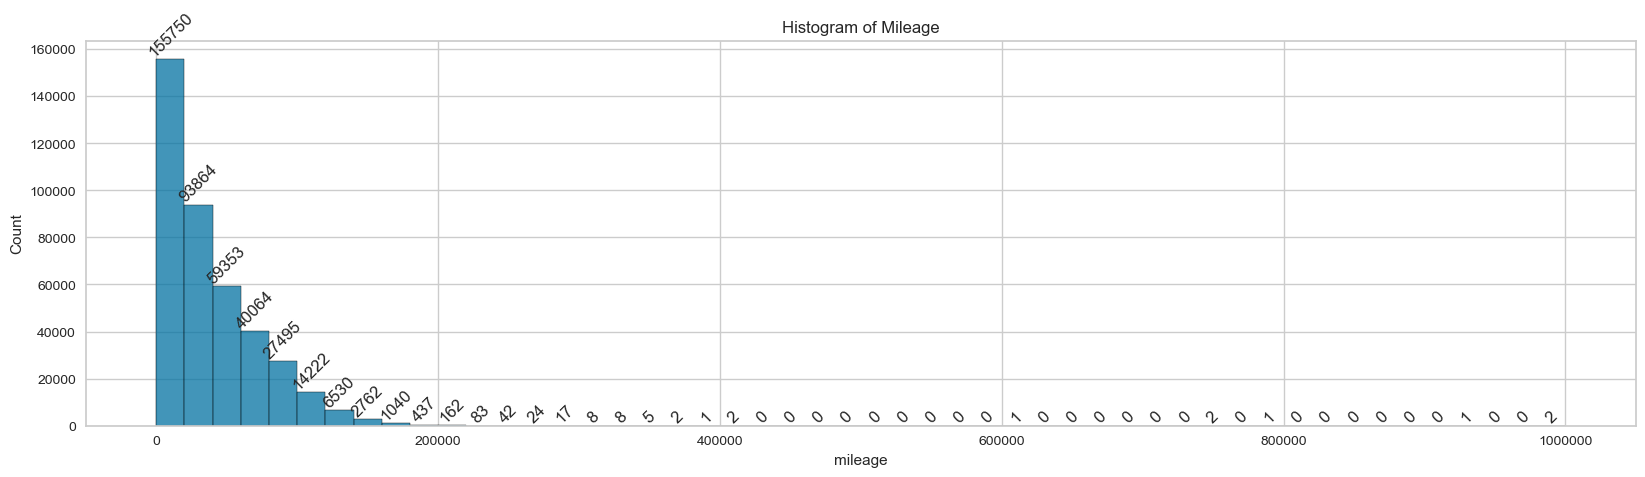

In [22]:
# Detailed Visualization the dispersion measures of mileage column via histogram
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.histplot(df['mileage'], bins=50, binrange=(0, 1000000))

# Labelling bars in the histogram
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Histogram of Mileage")
plt.show()


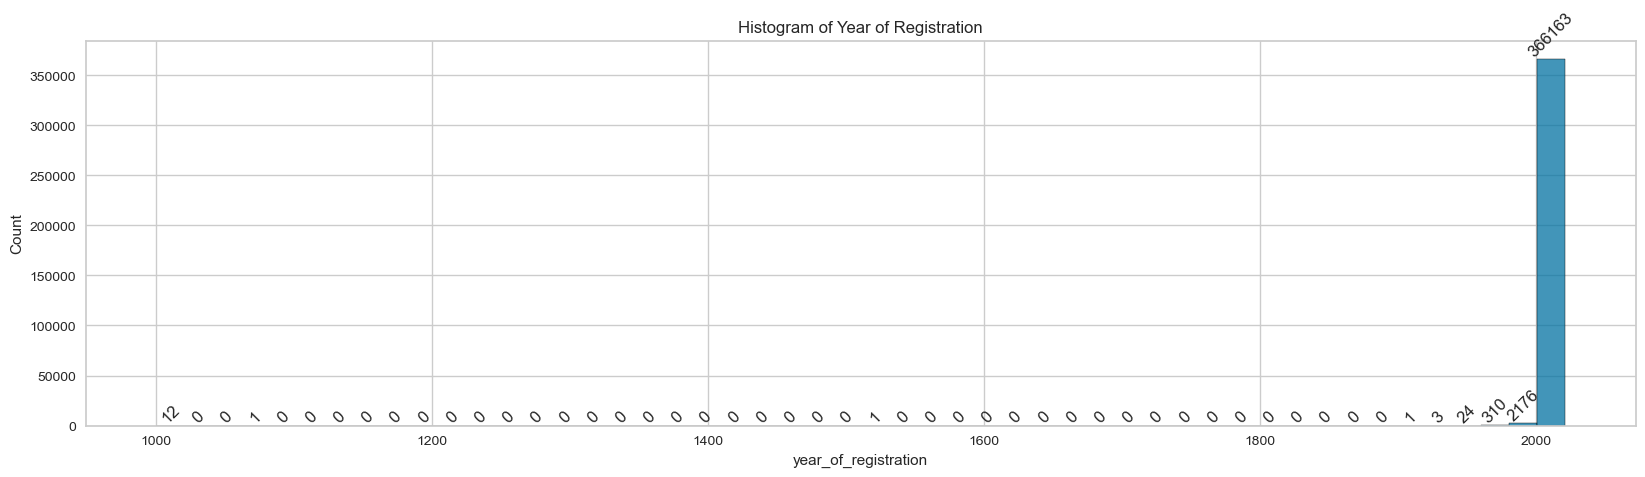

In [23]:
# Detailed Visualization the dispersion measures of year_of_registration column via histogram
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.histplot(df['year_of_registration'], bins=50, binrange=(1000, 2021))

#Labelling bars in the histogram
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Histogram of Year of Registration")
plt.show()

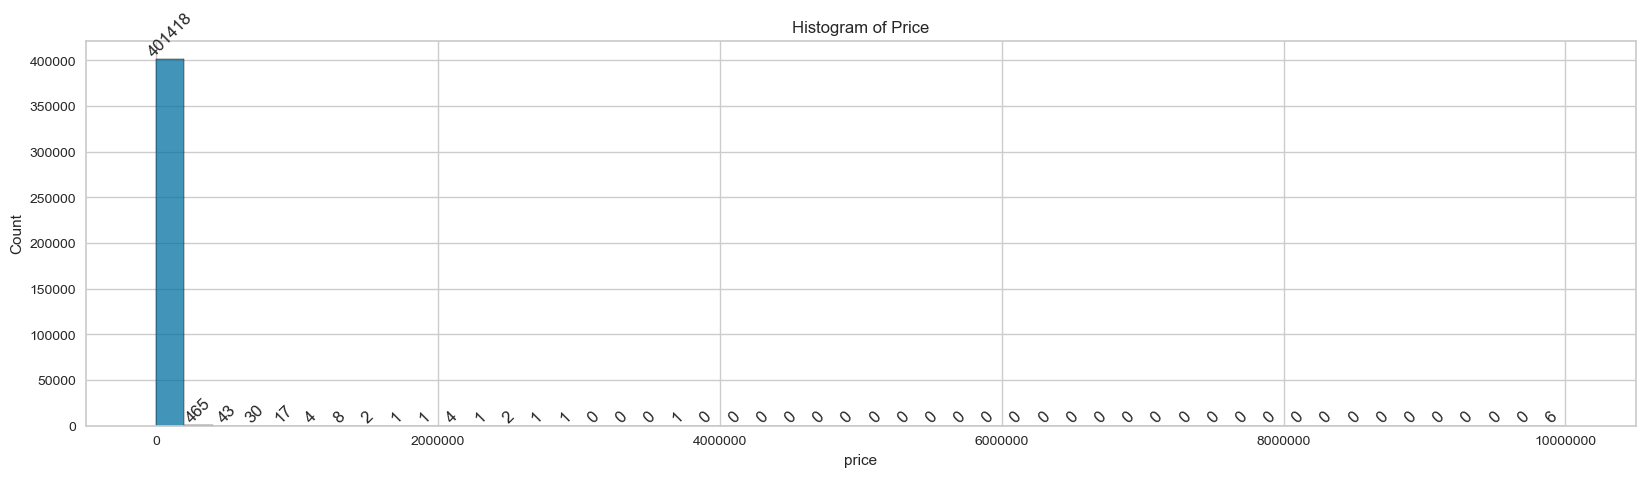

In [24]:
# Detailed Visualization the dispersion measures of price column via histogram
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.histplot(df['price'], bins=50, binrange=(0, 10000000))

# Labelling bars in the histogram
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Histogram of Price")
plt.show()

<b>Observation(s):</b>
* `mileage` column shows that the milage of most of the vehicles are in between 0 to 20,000. It shows that most of them are either new or a little bit old when it comes to condition.
* `year_of_registration` reveals a very insteresting aspect that most of the cars were registered on the website are fairly new i.e. they have been recently registered during the 2000's era.
* `price` column values dispersion reveals that most of the vehicles on display are within most of the people's budget and there are lesser number of vehicles which are more than £200,000.


### <b>i. Outliers Detection of Quantitative Columns</b>

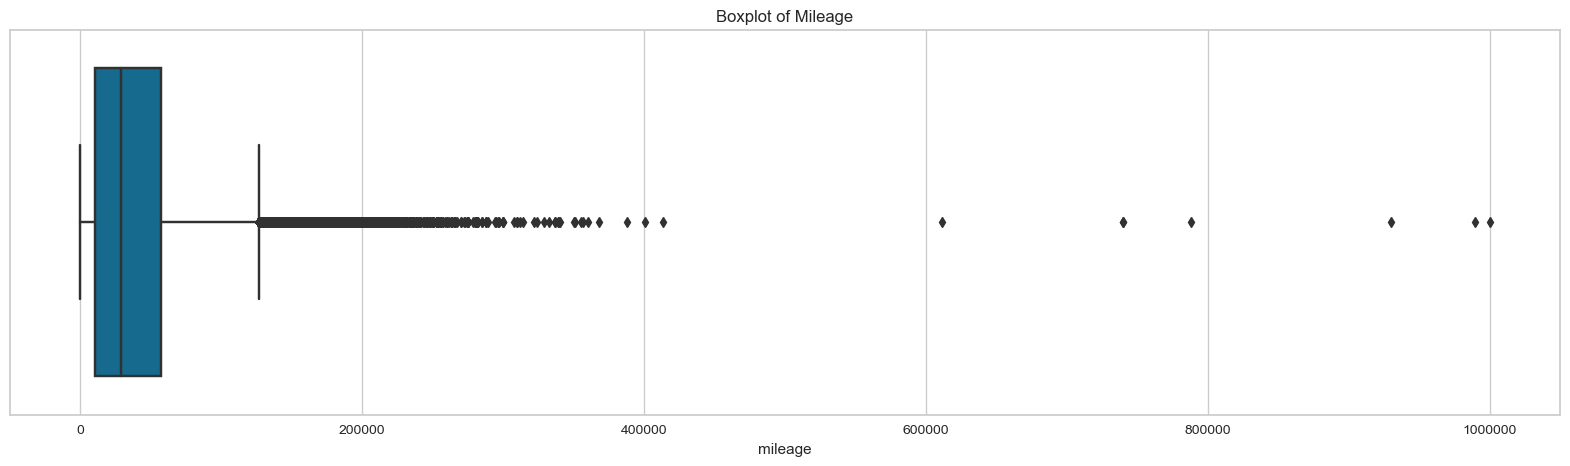

In [25]:
# Outlier detection of the mileage column via a box plot
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
sns.boxplot(data=df, x='mileage')
plt.title("Boxplot of Mileage")
plt.show()

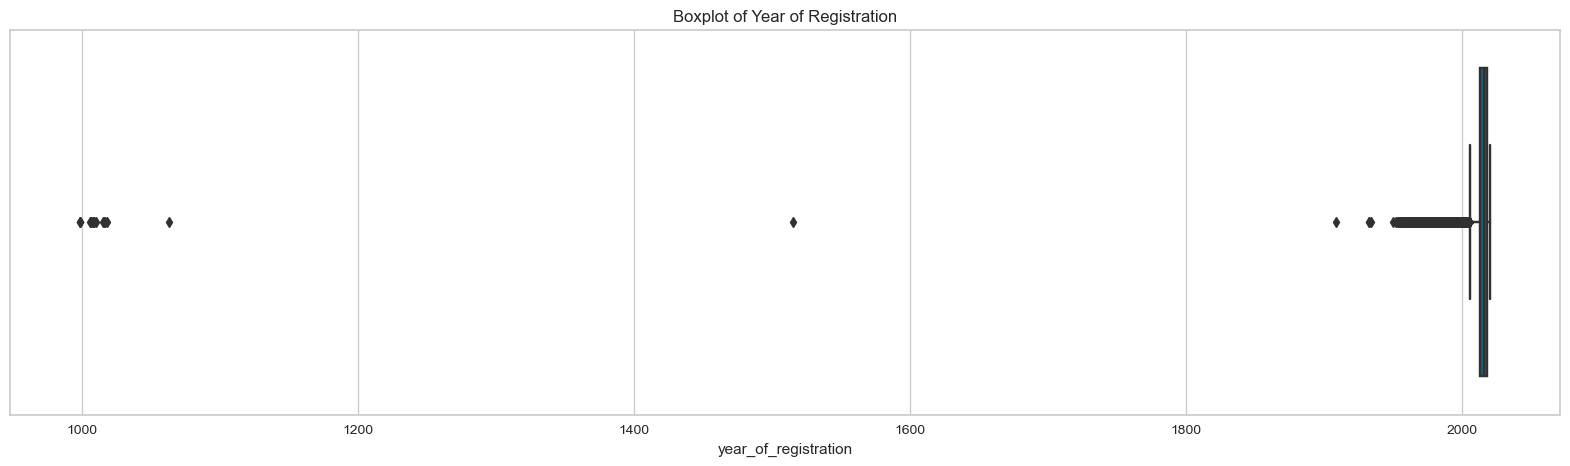

In [26]:
# Outlier detection of the year_of_registration column via a box plot
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
sns.boxplot(data=df, x='year_of_registration')
plt.title("Boxplot of Year of Registration")
plt.show()

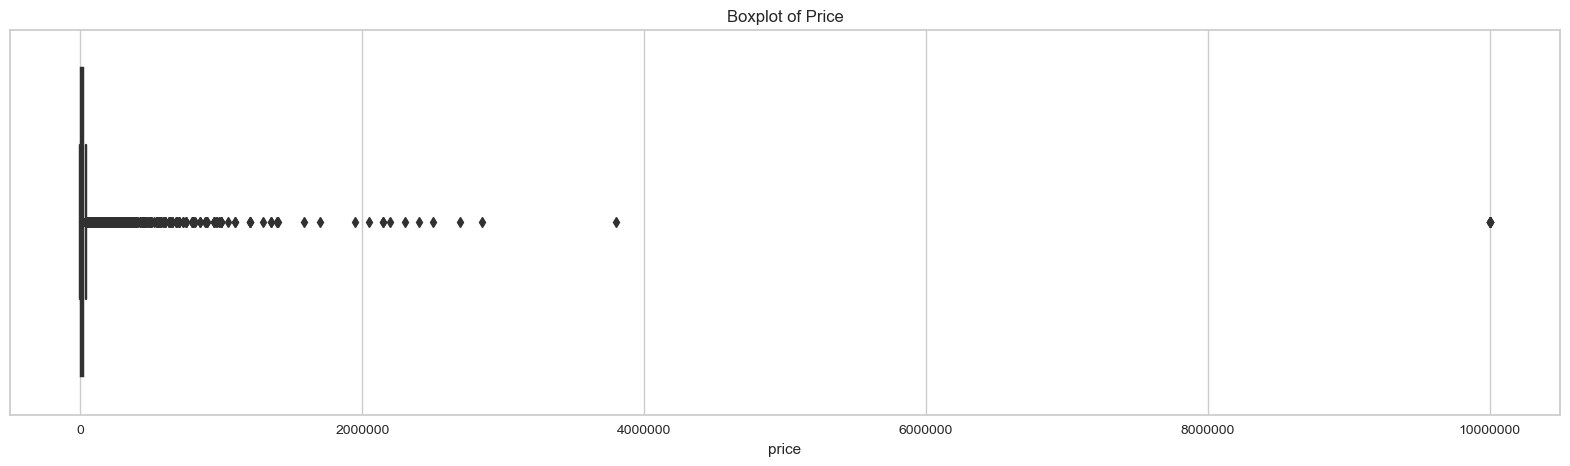

In [27]:
# Outlier detection of the price column via a box plot
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
sns.boxplot(data=df, x='price')
plt.title("Boxplot of Price")
plt.show()

<b>Observation(s):</b>

* There are a few outliers after `mileage` value of above 150,000 and it should be investigated whether they are genuine values or are values which have error.
* In the `year_of_registration` column, there are a few values which dates even before 1500. So such values needs to be investigated because it's highly unlikely that there are cars for auction, if they have even survived for that long.
* Regarding `price`, a few values are above £380,000 needs to be checked whether they are error values or they are of sports / luxurious cars as they are extremely expensive.

### <b>j. Value Distributions of Qualitative Columns</b>

This section is just about getting detailed information along with values about the related columns for detailed analysis.

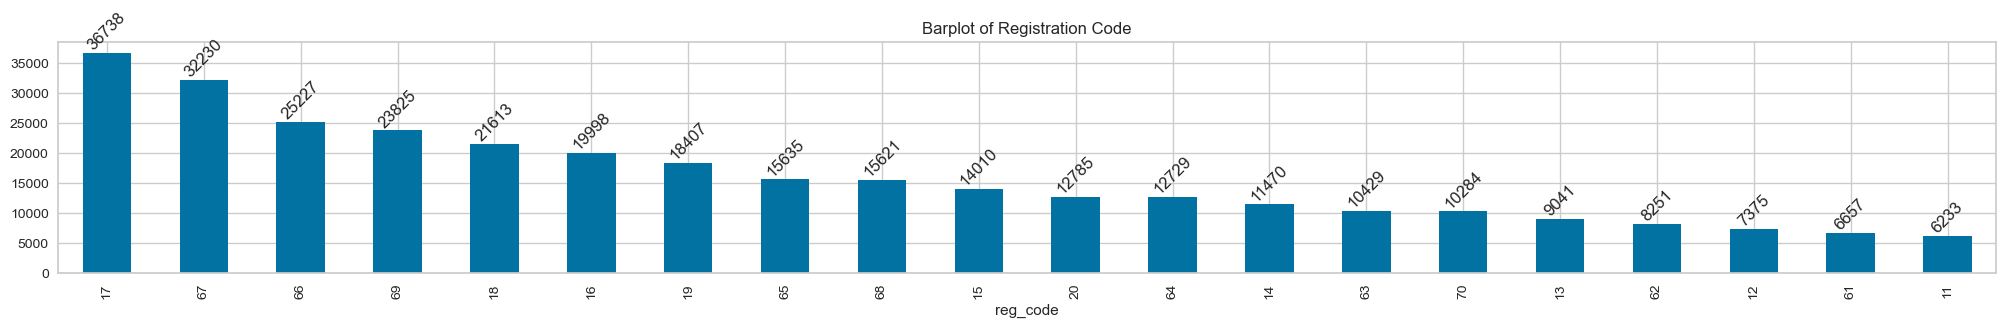

In [28]:
# Detailed Visualization the dispersion measures of reg_code column via bar plot
plt.figure(figsize=(25, 3))
plt.ticklabel_format(style='plain')
ax = df['reg_code'].value_counts().nlargest(20).plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Barplot of Registration Code")
plt.show()

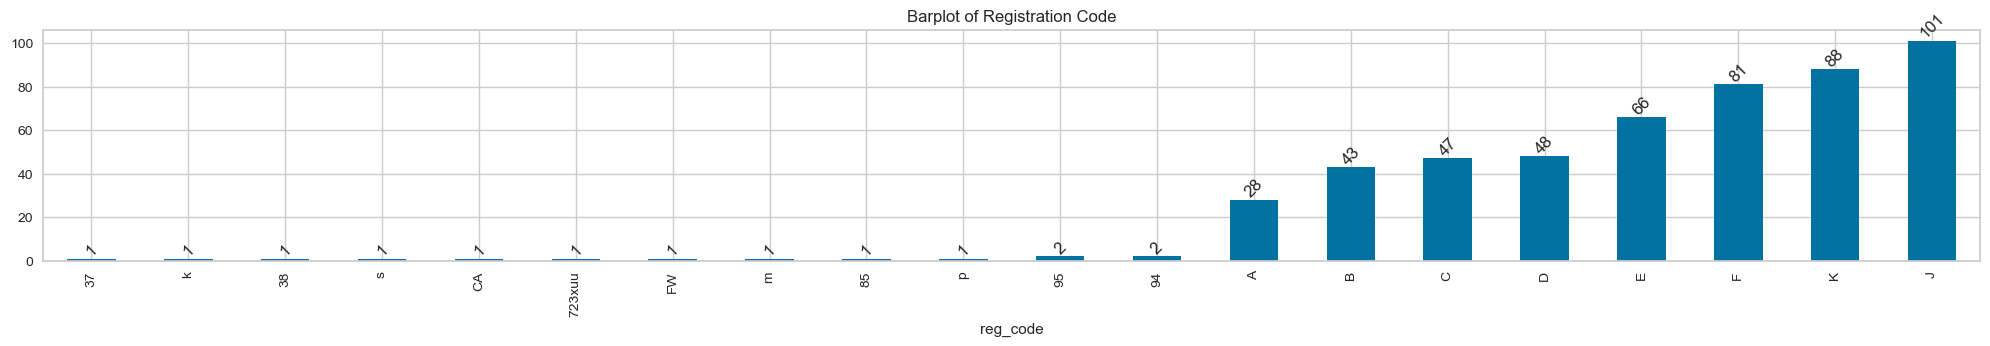

In [29]:
# Detailed Visualization the dispersion measures of reg_code column via bar plot
plt.figure(figsize=(25, 3))
plt.ticklabel_format(style='plain')
ax = df['reg_code'].value_counts().nsmallest(20).plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Barplot of Registration Code")
plt.show()

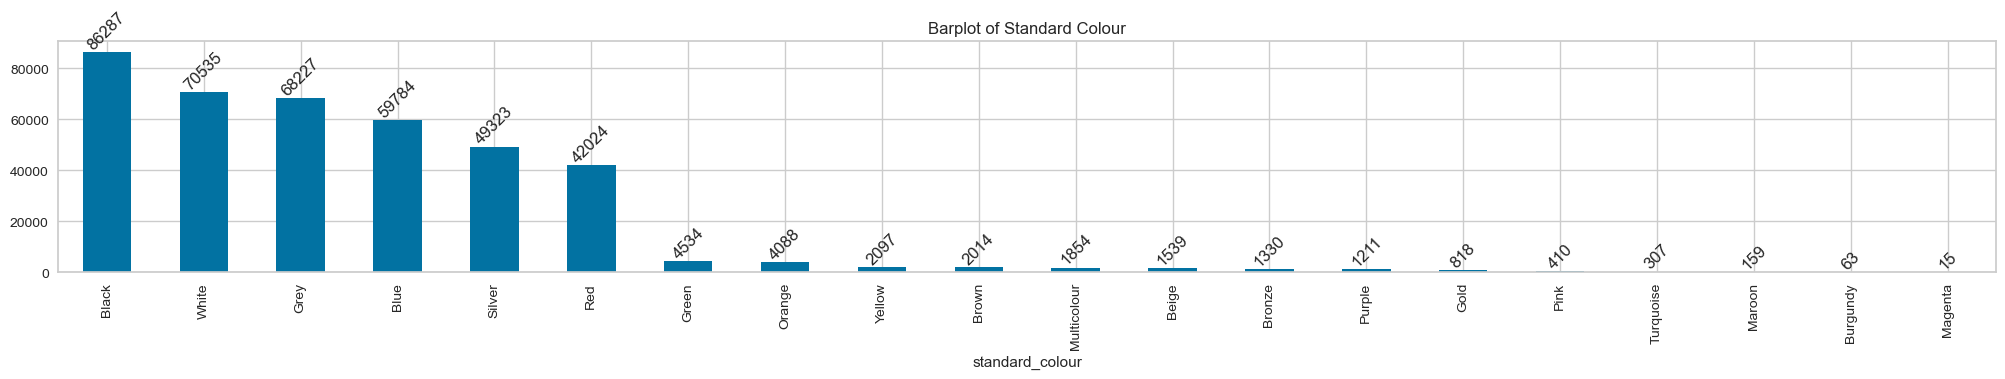

In [30]:
# Detailed Visualization the dispersion measures of standard_colour column via bar plot
plt.figure(figsize=(25, 3))
plt.ticklabel_format(style='plain')
ax = df['standard_colour'].value_counts().nlargest(20).plot(kind='bar')

# Labeling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Barplot of Standard Colour")
plt.show()

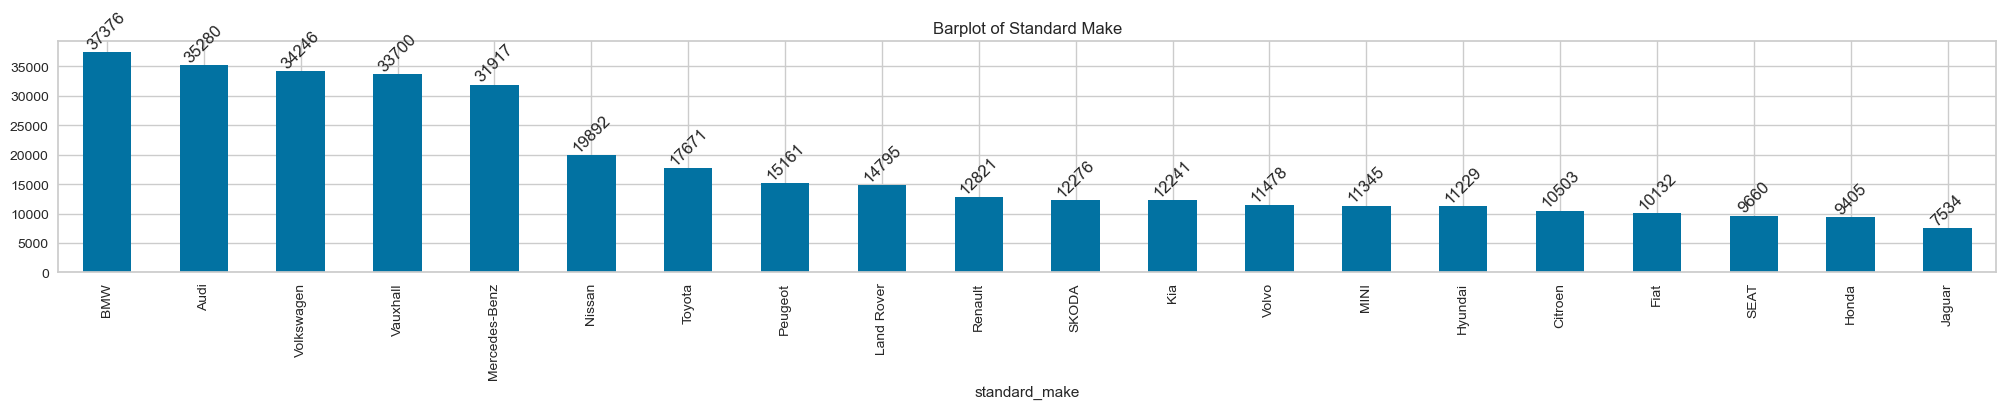

In [31]:
# Detailed Visualization the dispersion measures of standard_make column via bar plot
plt.figure(figsize=(25, 3))
plt.ticklabel_format(style='plain')
ax = df['standard_make'].value_counts().nlargest(20).plot(kind='bar')

# Labeling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Barplot of Standard Make")
plt.show()

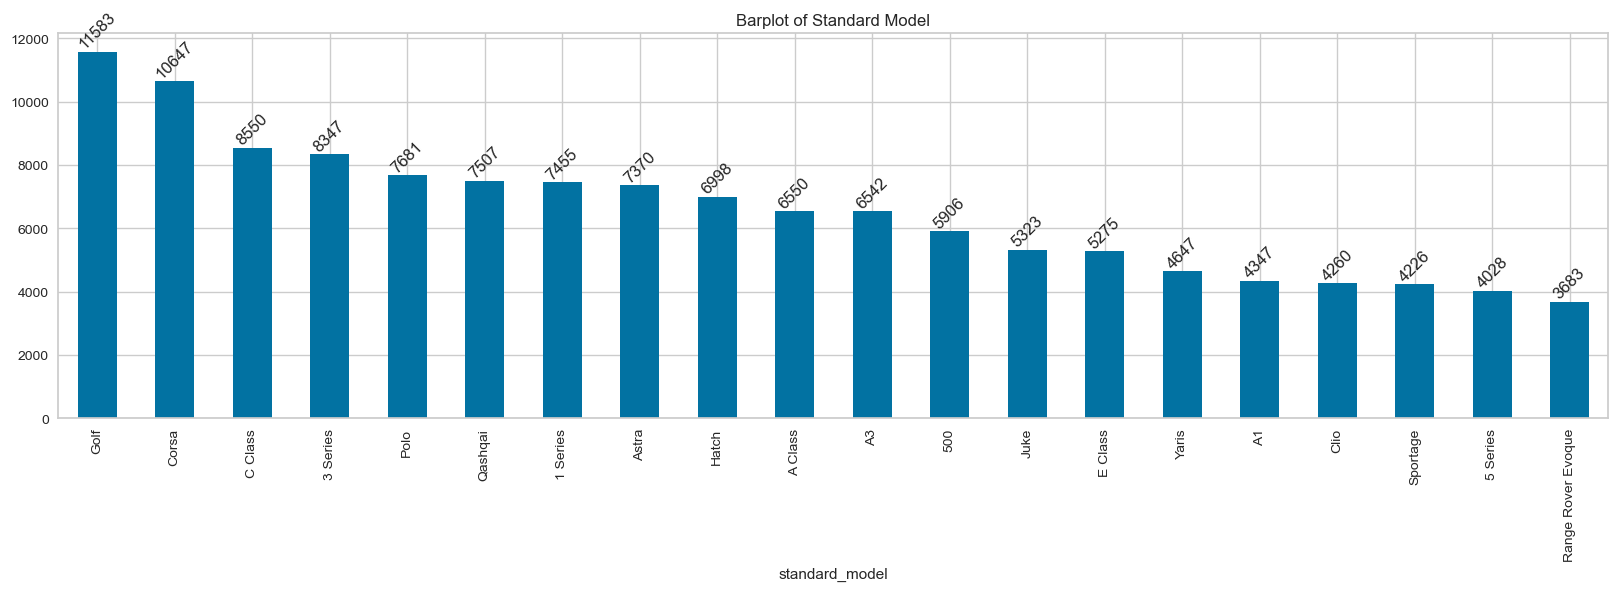

In [32]:
# Detailed Visualization the dispersion measures of standard_model column via bar plot
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = df['standard_model'].value_counts().nlargest(20).plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Barplot of Standard Model")
plt.show()

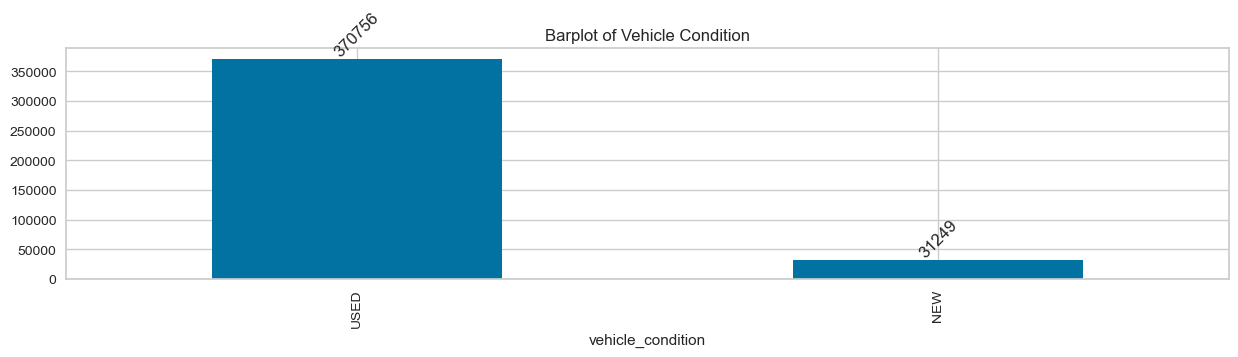

In [33]:
# Detailed Visualization the dispersion measures of vehicle_condition column via bar plot
plt.figure(figsize=(15, 3))
plt.ticklabel_format(style='plain')
ax = df['vehicle_condition'].value_counts().plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Barplot of Vehicle Condition")
plt.show()

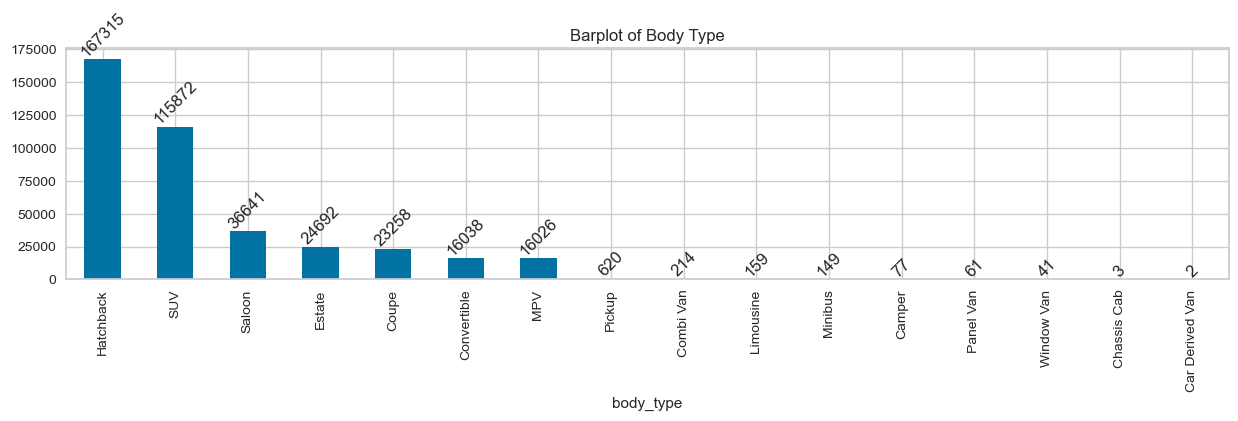

In [34]:
# Detailed Visualization the dispersion measures of body_type column via bar plot
plt.figure(figsize=(15, 3))
plt.ticklabel_format(style='plain')
ax = df['body_type'].value_counts().plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Barplot of Body Type")
plt.show()

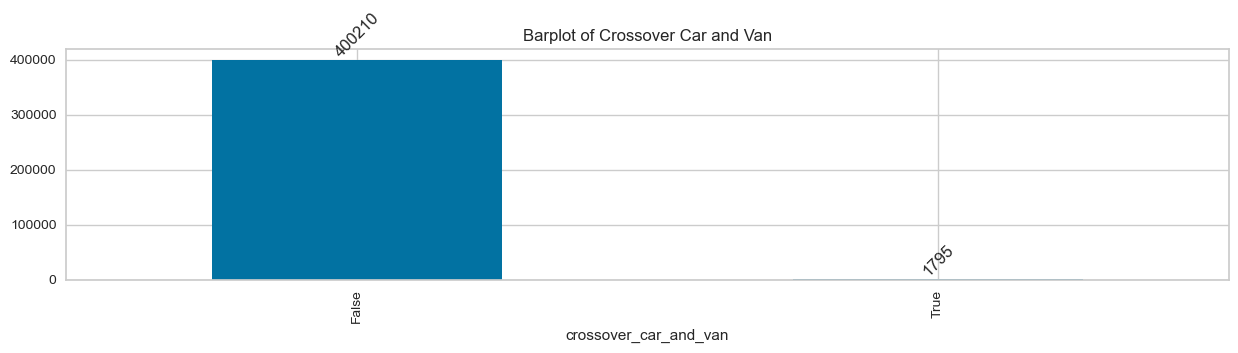

In [35]:
# Detailed Visualization the dispersion measures of crossover_car_and_van column via bar plot
plt.figure(figsize=(15, 3))
plt.ticklabel_format(style='plain')
ax = df['crossover_car_and_van'].value_counts().plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Barplot of Crossover Car and Van")
plt.show()

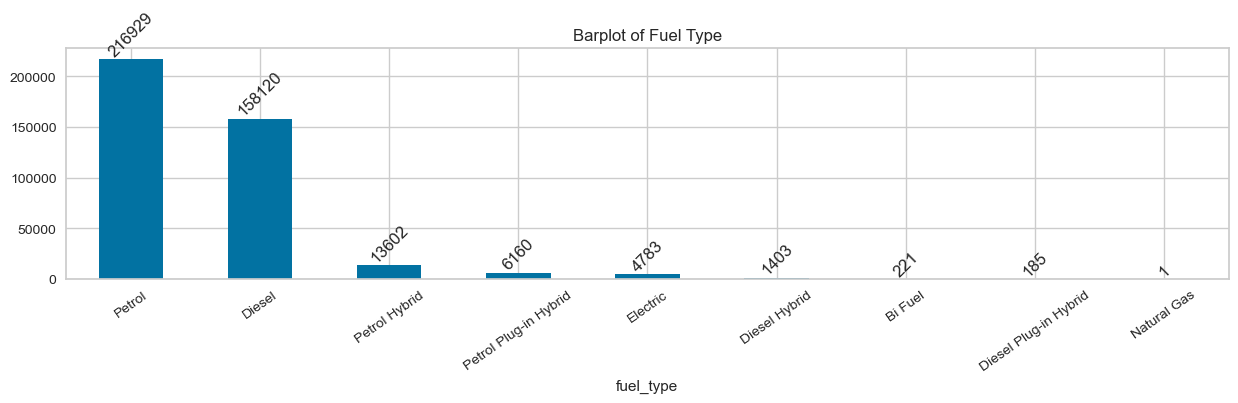

In [36]:
# Detailed Visualization the dispersion measures of fuel_type column via bar plot
plt.figure(figsize=(15, 3))
plt.ticklabel_format(style='plain')
ax = df['fuel_type'].value_counts().plot(kind='bar')
plt.xticks(rotation=35)

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.title("Barplot of Fuel Type")
plt.show()

<b> Observation(s): </b>

* `reg_code` seems to have more registeration code which have numbers instead of single letters. This piece of information helps in assuming that most of the cars were registered in the era of 2000's.
* `standard_colour` shows that black, white, and gray are the popular colour choices of people when they buy a car.
* `standard_make` reveals another interesting insight that BMW, Vaukhwagen, Nissan, Toyota, and similar brands are prevalent in numbers which are known to be the ones which people from every class and budget can afford. This information coincides with the `price` column's earlier findings which showed that most of the cars in the inventory are cheaper cars.
* `standard_model` does not reveal any trend because it is simply composed of models which are most assosciated with cheaper and luxuy cars like Volkswagen Golf, Vauxhall Corsa, Mercedes-Benz C-Class, and BMW 3 Series.
* `vehicle_condition` tells that as AutoTrader deals with majorly of used cars, they are higher in number than the newer cars.
* `body_type` reveals that majority of the cars on display are hatchbacks, which are cheaper to buy than SUV because of the smaller size, being lightweight and have one of the best fuel economy. This synchronize with the other earlier analysis that common people are more interested in AutoTrader for buying or selling cars.
* `fuel_type` gives a very common insight that generally in the UK and around the world, cheaper cars' fuel type consist of Petrol & Diesel and these are the cars which are also commonly found on the roads as well. As the other technologies are not an prevailent in the world, the number of users are also lesser than the other fuel types as well.

### <b>k. Outlier Detection of Qualitative Columns</b>

In [37]:
# Saving the list of the categorical columns in a variable
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Setting the threshold for the least number of values in all the categorical columns which might be outliers
threshold = 5  

# Executing the code for the least number of values in all the categorical columns which might be outliers
for i in categorical_columns:
    print("Column Name:", i)
    less_numbers = df[i].value_counts()[df[i].value_counts() < threshold].index.tolist()
    print("Rare Categories:", less_numbers)

Column Name: reg_code
Rare Categories: ['95', '94', '37', 'k', '38', 's', 'CA', '723xuu', 'FW', 'm', '85', 'p']
Column Name: standard_colour
Rare Categories: ['Indigo']
Column Name: standard_make
Rare Categories: ['Maybach', 'Lancia', 'Holden', 'Opel', 'Jensen', 'Ariel', 'AC', 'Tiger', 'Aixam', 'Beauford', 'Noble', 'Plymouth', 'BAC', 'Pilgrim', 'Dax', 'Zenos', 'Sebring', 'Datsun', 'Gentry', 'Radical', 'Pontiac', 'Buick', 'Mitsuoka', 'AK', 'Carbodies', 'Mev', 'Ultima', 'Panther', 'Leyland', 'Reliant', 'Bristol', 'Wolseley', 'Pagani', 'International', 'Custom Vehicle']
Column Name: standard_model
Rare Categories: ['560', 'Talento', 'Kyron', 'Relay', 'Frontera', 'Alpina B3', 'Tamora', 'Odyssey', 'Charger', 'Boxer', 'P1', '918', 'Tribeca', 'RV8', 'Alpina XD3 Bi-Turbo', 'Commander', 'Seicento', 'T Series', 'Exiga', 'GTO', 'Cygnet', 'Escalade', 'Series I', 'Silver Spur', 'NV250', 'Sienta', 'Stream', 'Epica', 'Lightweight', '4200', '380', '11', 'Z8', 'DB5', 'Pajero', 'Countach', 'CTS', 'Alpin

<b> Observation(s): </b>

As outliers in categorical column cannot be viewed as a boxplot, a different technique <a href="https://www.geeksforgeeks.org/wand-threshold-function-python/" target="_blank">threshold() </a> was used to get some insights on the them.

* `reg_code` reveals that cars having older number plates are lesser in numbers.
* `standard_colour` does not reveal much as they are just colour of cars which are not much in quantity
* `standard_make` & `standard_model` does not reveal much except that it has names of manufacturers like Bugatti which are not that much known to customers.
* `body_type` shows us that commercial automobile like Chassis Cab are lesser in numbers because it is a known website for primarily private customers.
* `fuel_Type` reveals that natural gas is the least fuel type of cars on display

### <b>l. Identify Good Predictors</b>

There are quite a number of predictors which are considered for being good enough for predicting price of a vehicle based on the understanding of the problem, domain, and related research:

* `mileage` - Generally prices are highly dependent on the mileage of the vehicle because if a vehicle has a high mileage, then it is considered that it has gone through a significant detoriation and that decreases the price of the car significantly.

* `standard_make` - Although it may seem that the name of the manufacturer might not be a feature that will help in predicting the price of the car; but it does play a key role because generally a reputation attached to the name does have an influence on not only the price of the vehicle, but also it helps in retaining a vehicle's value for a significant amount of time.

* `standard_model` - There are numerous vehicle manufacturers which launch models of the cars with different price points just to attract customers of different price segments. For instance, recently <a hred="https://www.carwale.com/new/best-maruti-suzuki-cars-under-10-lakh/" target="_blank">Suzuki</a> launched Maruti Suzuki K10 which targeted customers with low price point, and on the other hand, it also launched Maruti Suzuki Grand Vitara for customers with high budget.

* `standard_colour` - With almost all of the vehicle brands, some of the colour are more popular than others, and it significantly contributes to the price of the car. For instance, <a href="https://www.freecarmag.com/the-classic-valuer-are-ferraris-really-worth-more-in-red#:~:text=Resale%20red%20is%20certainly%20the,blue%2C%20both%20at%2011%25." target="_blank">Ferrari</a> is a renowned brand where almost 54 percent of their vehicles are sold in red. The second and third most famous colours were black and gray, both at 11 percent.

* `vehicle_condition` - As per AutoTrader, two vehicle conditions are mentioned in the dataset and it is comprised of NEW and USED. So, this must be a good predictor based on the assumption that used cars are priced lower than the newer ones.

* `year_of_registration` - The year on which a vehcile is registered is selected to be a good estimator because the more recent a car is registered, the smaller difference in the retail and present price of that same vehicle will be. That is why, generally all the cars are priced according to the year in which they were first registered.

* `body_type` - In the market, there are vehicles with several body types available, based on the number of features included in them. That is why different body types are priced higher or lower according to their features and demand. For instance, <a href="https://www.gbvehicleleasing.co.uk/news/car-body-types#:~:text=Hatchbacks%20tend%20to%20have%20lower,contribute%20to%20lower%20insurance%20rates." target="_blank">Hatchbacks</a> are not only priced lower, but they also does not hold their price for a longer period of time when it comes with other types like convertible.

* `crossover_car_and_van` - Around the world, <a href="https://www.autotrader.co.uk/content/advice/what-is-a-crossover-car" target="_blank">crossovers</a> are priced higher because they they offer more space than a car, offer better visibility to the drivers, more suited for difficult terrain, usually come with available AWD, and offer other features. 

* `fuel_type` - Due to technological advances in the automobile industry, new and efficient fuel systems are installed in the vehicles. However, due to the different type of costs associated with newer technologies, vehicles with those systems are generally priced higher than old and conventional systems of petrol and diesel.

On the other hand, there are a couple of features that will not be considered for being a good predictor because they do not play any part in predicting price of any vehicle within this dataset due to the nature of these two features:

* `public_reference` - This feature is only used as a unique identifier for an advertisement of a vehicle on the website and it does not depend on the other feature to formulate a value in this column. As it is only an identifier that is why it is not considered a predictor for predicting price of the vehicle.

* `reg_code` - Just like an other country, the values in this features are used for registration of the vehicle for primarily identification, record keepiing, and taxation purposes by the relevant fovernment department.

### <b>m. Data Processing for Exploration and Visualization</b>

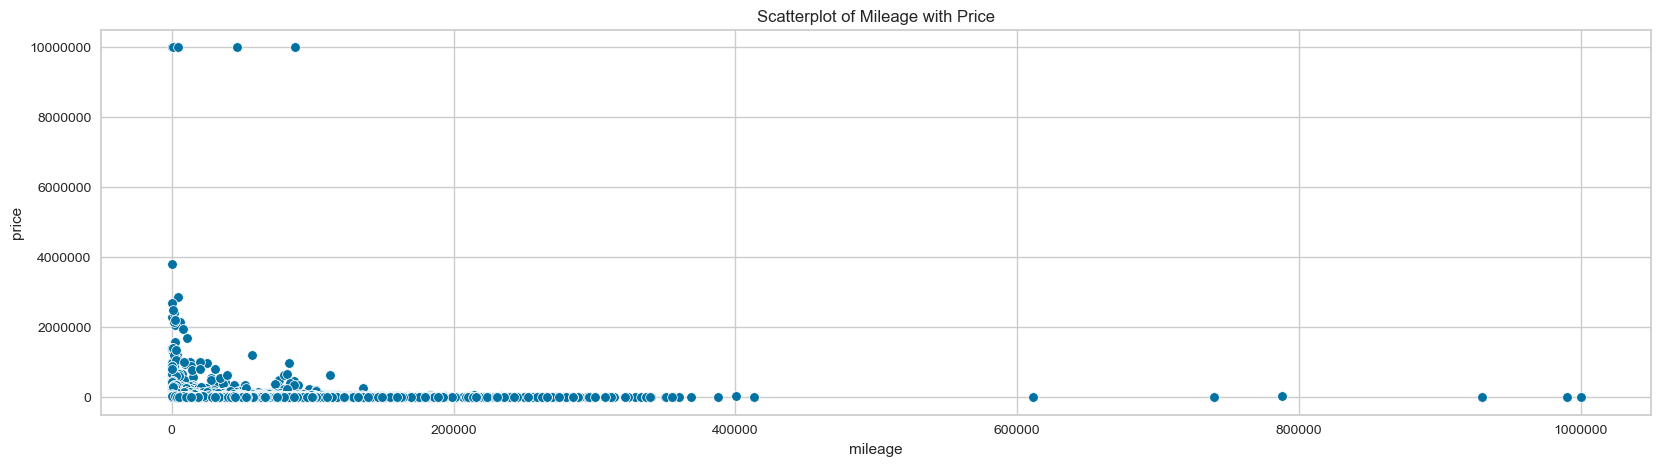

In [38]:
# Scatterplot of mileage with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
sns.scatterplot(data=df, x='mileage', y='price')
plt.title("Scatterplot of Mileage with Price")
plt.show()

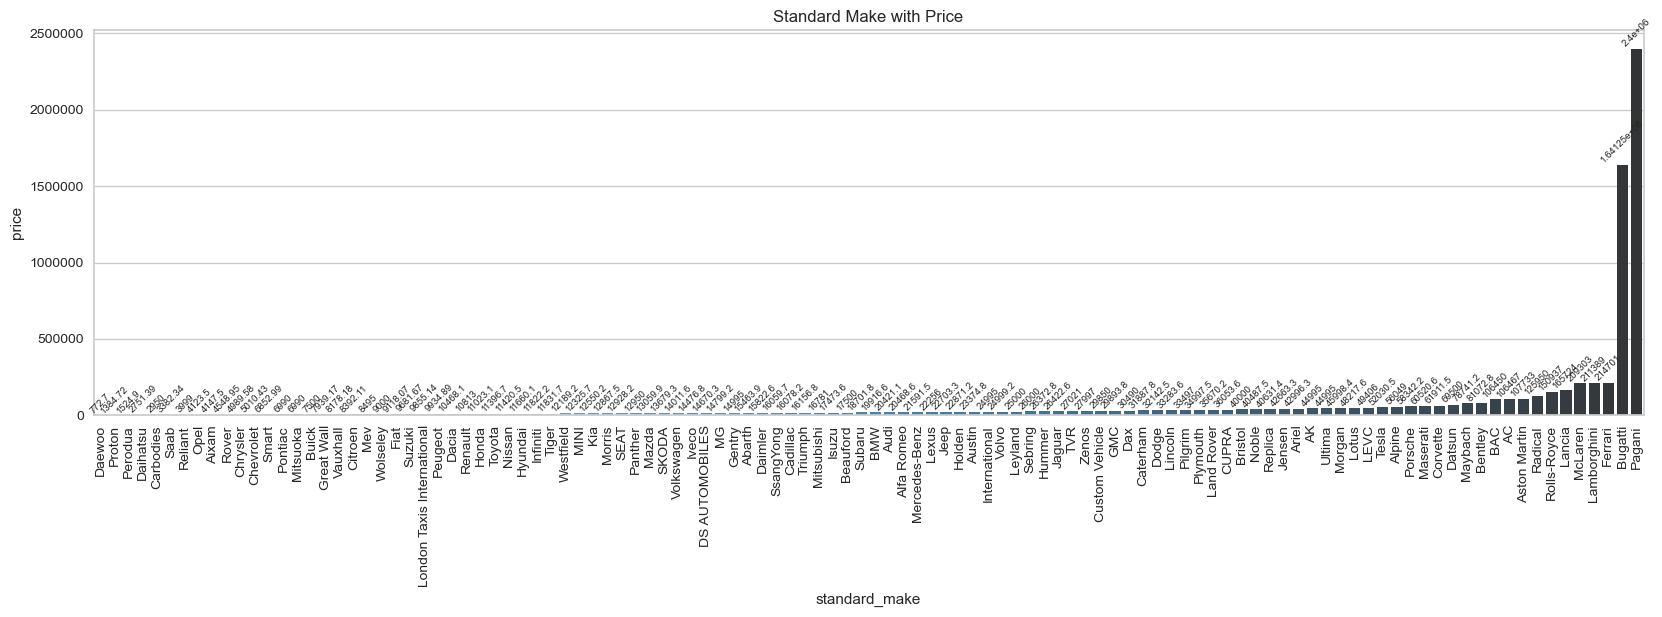

In [39]:
# Bar plot of standard_make with price 
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df.groupby('standard_make')['price'].mean().reset_index().sort_values(by='price', ascending=True), x='standard_make', y='price', errorbar=None, palette='Blues_d')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=45 ,label_type="edge", size=7)
plt.title("Standard Make with Price")
plt.show()

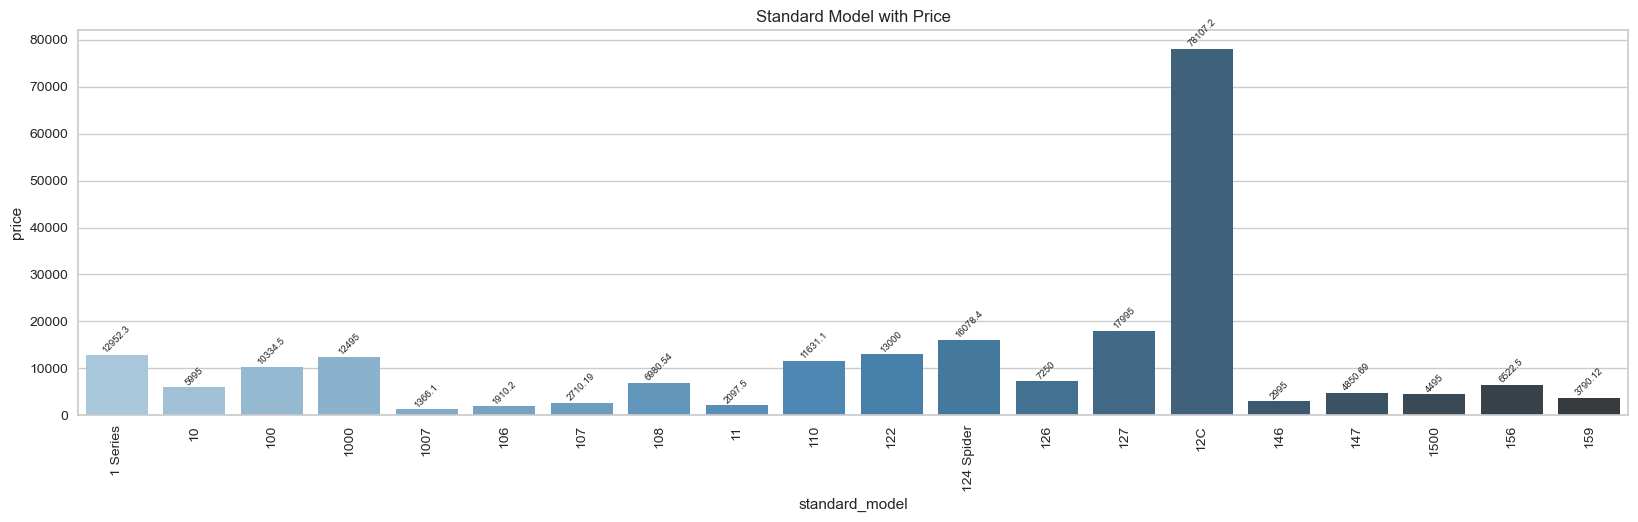

In [40]:
# Bar plot of standard_make with price 
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df.groupby('standard_model')['price'].mean().reset_index().sort_values(by='standard_model', ascending=True).head(20), x='standard_model', y='price', errorbar=None, palette='Blues_d')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=45 ,label_type="edge", size=7)
plt.title("Standard Model with Price")
plt.show()

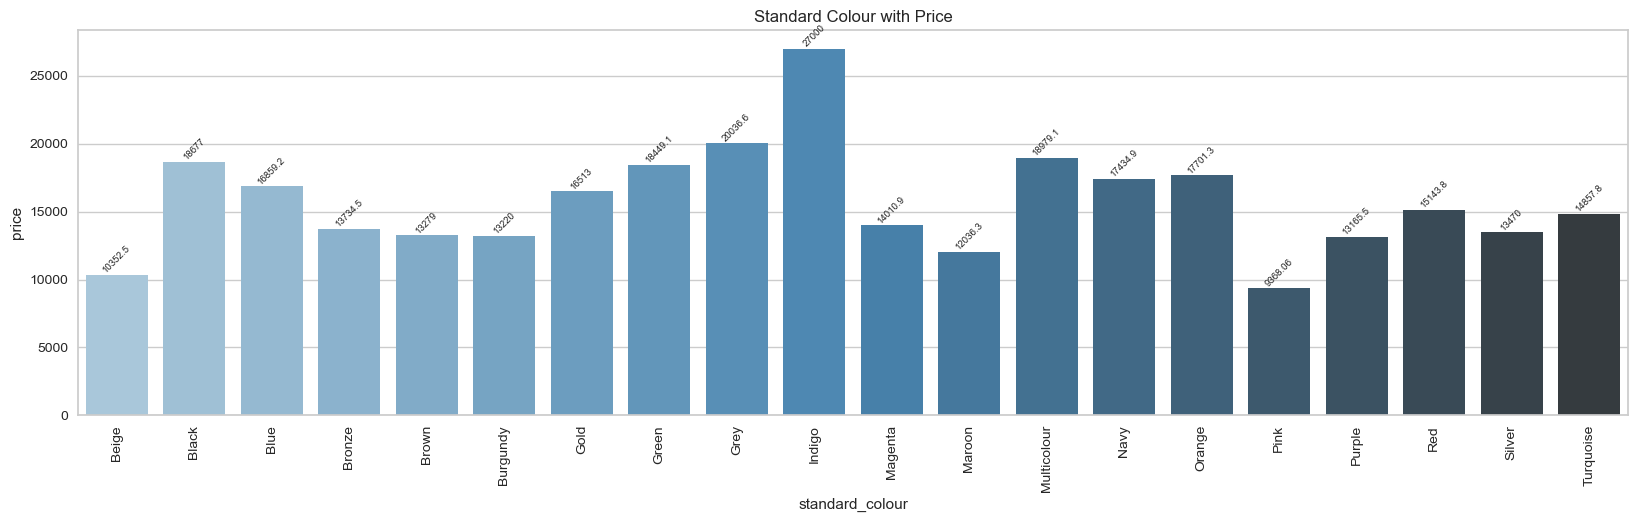

In [41]:
# Bar plot of standard_colour with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df.groupby('standard_colour')['price'].mean().reset_index().sort_values(by='standard_colour', ascending=True).head(20), x='standard_colour', y='price', errorbar=None, palette='Blues_d')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=45 ,label_type="edge", size=7)
plt.title("Standard Colour with Price")
plt.show()

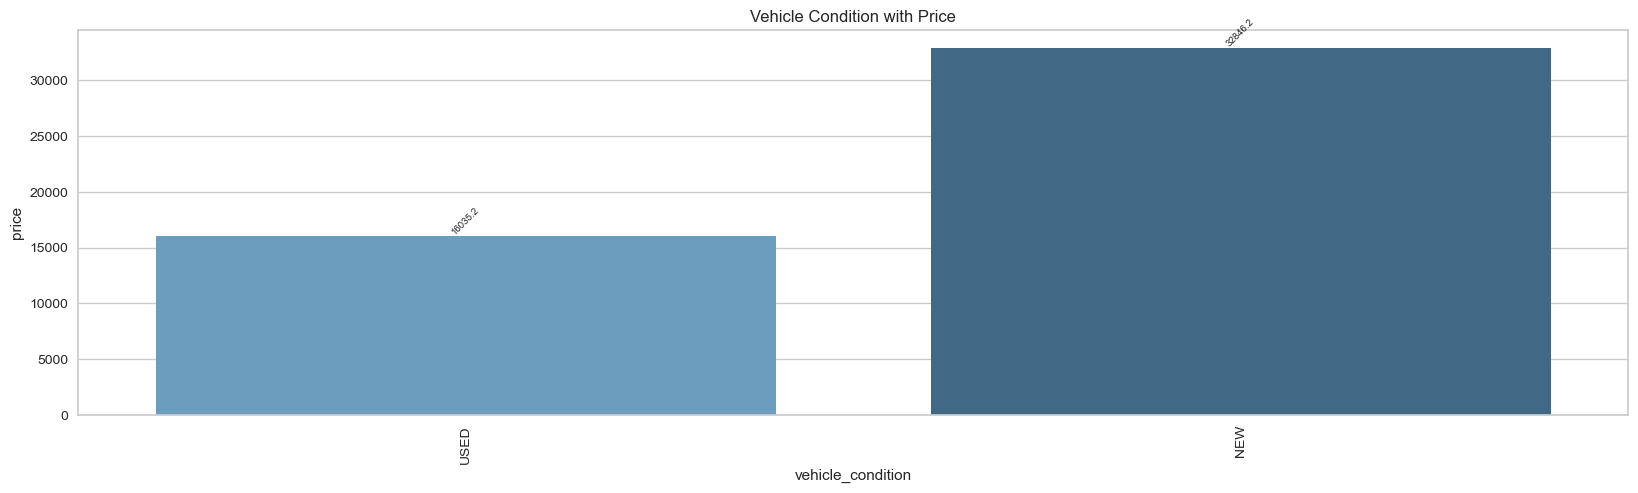

In [42]:
# Bar plot of vehicle_condition with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df.groupby('vehicle_condition')['price'].mean().reset_index().sort_values(by='price', ascending=True).head(20), x='vehicle_condition', y='price', errorbar=None, palette='Blues_d')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=45 ,label_type="edge", size=7)
plt.title("Vehicle Condition with Price")
plt.show()

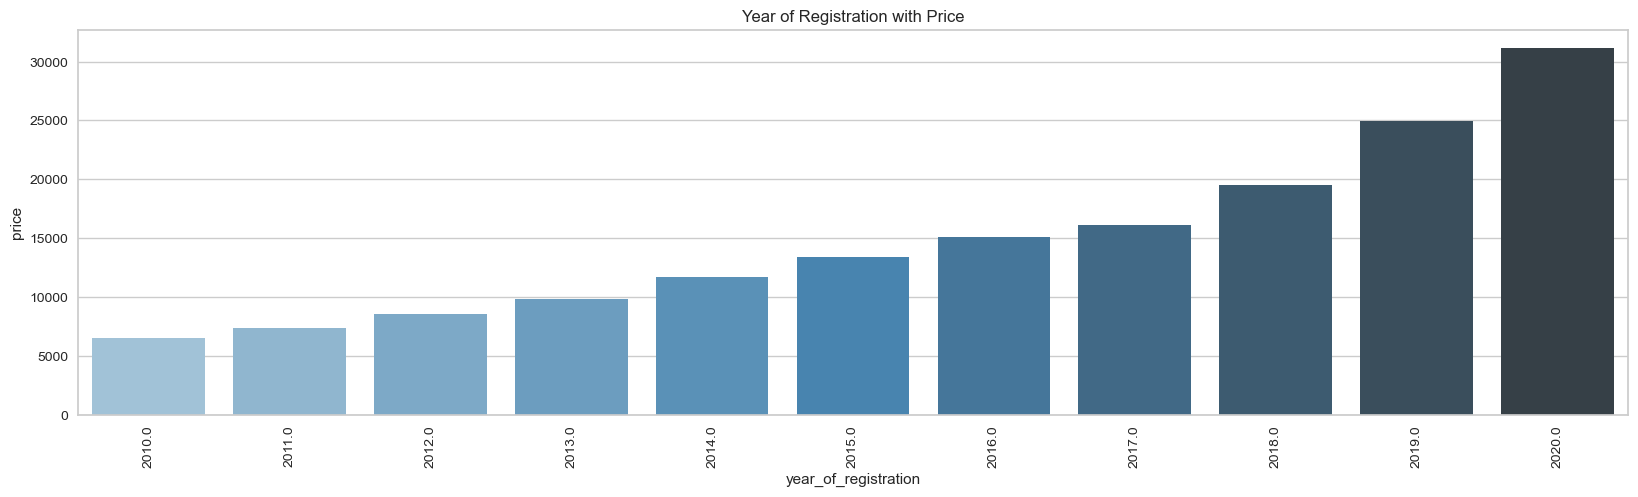

In [43]:
# Bar plot of year_of_registration with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df.query("year_of_registration >= 2010.0").groupby('year_of_registration')['price'].mean().reset_index().sort_values(by='year_of_registration', ascending=True), x='year_of_registration', y='price', errorbar=None, palette='Blues_d')
plt.xticks(rotation=90)
plt.title("Year of Registration with Price")
plt.show()

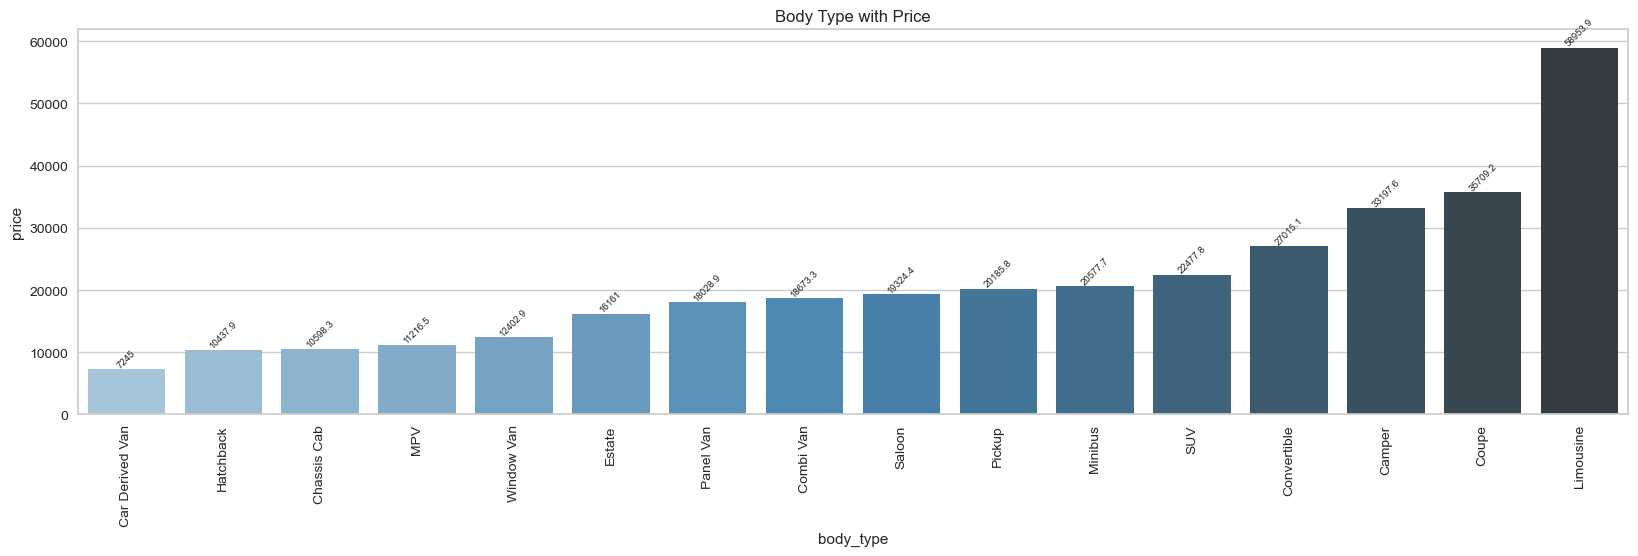

In [44]:
# Bar plot of body_type with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df.groupby('body_type')['price'].mean().reset_index().sort_values(by='price', ascending=True).head(20), x='body_type', y='price', errorbar=None, palette='Blues_d')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=45 ,label_type="edge", size=7)
plt.title("Body Type with Price")
plt.show()

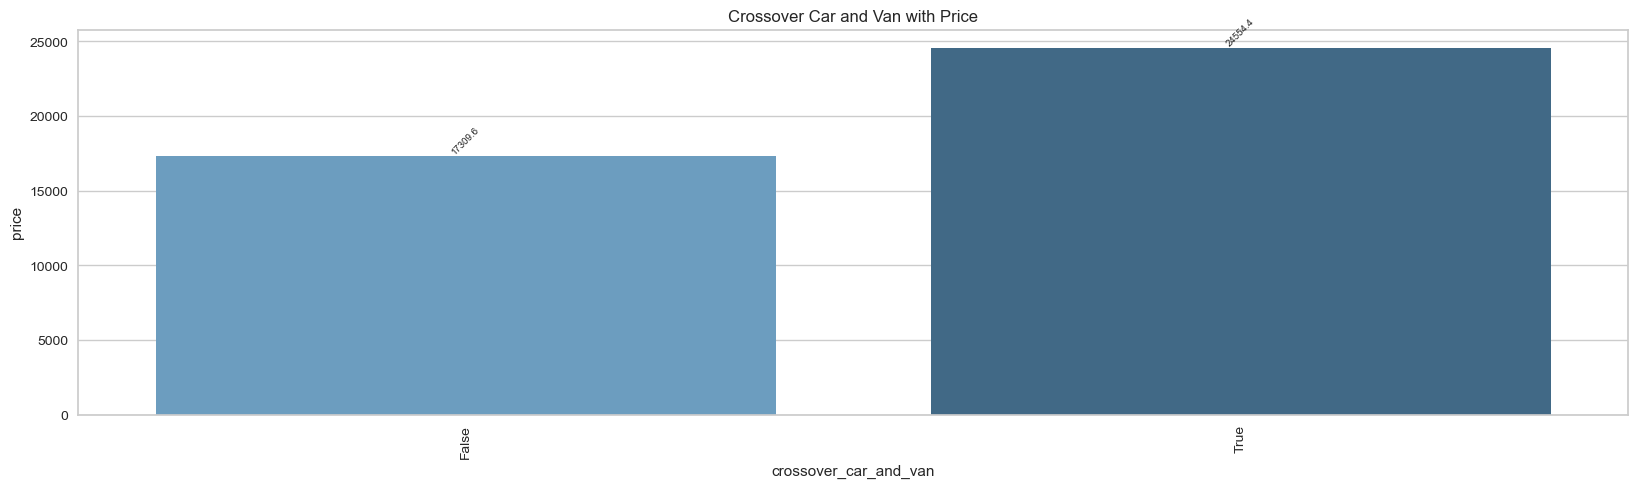

In [45]:
# Bar plot of crossover_car_and_van with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df.groupby('crossover_car_and_van')['price'].mean().reset_index().sort_values(by='price', ascending=True).head(20), x='crossover_car_and_van', y='price', errorbar=None, palette='Blues_d')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=45 ,label_type="edge", size=7)
plt.title("Crossover Car and Van with Price")
plt.show()

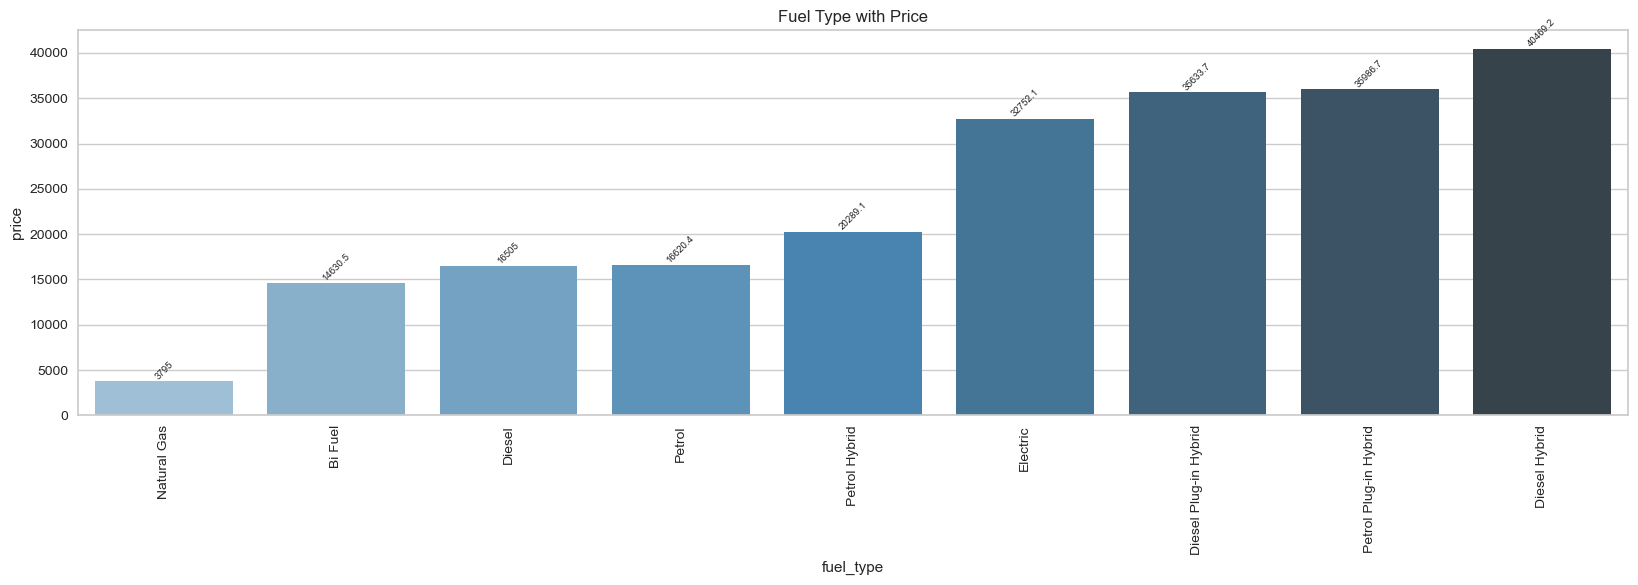

In [46]:
# Bar plot of fuel_type with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df.groupby('fuel_type')['price'].mean().reset_index().sort_values(by='price', ascending=True).head(20), x='fuel_type', y='price', errorbar=None, palette='Blues_d')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=45 ,label_type="edge", size=7)
plt.title("Fuel Type with Price")
plt.show()

<b>Observation(s):</b>
* According to the first bar plot, it can be easily observed that as `mileage` increase, then `price` of the vehicle decreases. It means that there is a negative but strong association in between them.

* In the second plot in between `standard_make` and `price`, it is observed that the mean price of expensive brands like Bugatti, Ferrari, Lamborgini and priced higer than other cheaper ones like Toyota, Honda, etc.

* Third bar plot which is in between `standard_model` and `price` gives a clear indication that different models of cars being launched by their respective manufacturers have a strong impact on the price of the car.

* Next plot in between `standard_colour` and `price` shows a clear indication that different colours of vehicles are prices differently in the world and it is based on the popularity and demand from the customers.

* `Vehicle_condition` association with `price` is extremely strong because as per the plot, new cars are priced higher than the cheaper ones, irrespective of the make of model of the vehicle.

* Another interesting plot in between `year_of_registration` with `price` reveals that the mean value of cars decreased with longer periods of time and it shows the strong relevance in predicting the price of a car.

* `body_type` association with `price` in terms of a bar plot confirms that the body type of a car is highly related to the price of a vehicle. For instance, Hutchback is priced much lower than Limousine, Coupe, and others.

* As mentioned earlier, crossover cars are priced higher due to a number of features which were mentioned earlier and are not found in vehicles which are not crossover. Bar plot in between `crossover_car_and_van` and `price` confirms it.

* Last bar plot in between `fuel_type` and `fuel` confirms that vehicles which have fuel systems like petrol and diesel fitted priced lower than the latest and expensive ones like Diesel Hybrid, Electric, etc.



## <b>2. Data Processing for Machine Learning</b>

### <b>a. Detecting & Dealing with Possible Duplicates</b>

In [47]:
# Checking for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 12)


<b>Observation(s):</b>

* No duplicates were found in the dataset

### <b>b. Checking for Possible Outliers and Deleting Them</b>

In [48]:
# Detecting any possible outliers in the mileage in a series and deleting them
mileage_counts = df['mileage'].value_counts().to_frame().reset_index().sort_values(by='mileage', ascending=True)
mileage_counts.columns = ['mileage', 'count']
pd.set_option('display.max_rows', None)
print(mileage_counts)

        mileage  count
0           0.0  16207
87          1.0    724
177         2.0    139
178         3.0    137
165         4.0    164
2           5.0   2434
136         6.0    298
157         7.0    180
122         8.0    397
140         9.0    241
1          10.0  12873
142        11.0    237
144        12.0    224
219        13.0     84
209        14.0     98
72         15.0    795
235        16.0     70
370        17.0     42
321        18.0     47
283        19.0     54
92         20.0    658
352        21.0     43
375        22.0     41
755        23.0     21
724        24.0     22
104        25.0    592
679        26.0     24
855        27.0     18
1286       28.0     12
791        29.0     20
232        30.0     72
1190       31.0     13
928        32.0     17
2657       33.0      9
3968       34.0      8
837        35.0     19
1763       36.0     10
1798       37.0     10
1406       38.0     11
2493       39.0      9
468        40.0     34
7590       41.0      6
441        

In [49]:
df.query('mileage == 999999.0')

public_reference   mileage reg_code standard_colour standard_make  \
43974   202008122406434  999999.0       63           White      Vauxhall   

      standard_model vehicle_condition  year_of_registration  price  \
43974          Astra              USED                2013.0   9999   

       body_type  crossover_car_and_van fuel_type  
43974  Hatchback                  False    Diesel

In [50]:
df.drop(df[df['mileage'] == 999999.0].index, inplace=True)

In [51]:
df.query('mileage == 999999.0')

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [52]:
# Detecting any possible outliers in the reg_code column in a series and deleting them
regcode_counts = df['reg_code'].value_counts().to_frame().reset_index().sort_values(by='reg_code', ascending=True)
regcode_counts.columns = ['reg_code', 'count']
pd.set_option('display.max_rows', None)

print(regcode_counts)

   reg_code  count
37       02    559
35       03    880
32       04   1307
31       05   1728
29       06   2373
25       07   3438
24       08   4028
23       09   4076
21       10   5390
19       11   6233
17       12   7375
15       13   9041
12       14  11470
9        15  14010
5        16  19998
0        17  36738
4        18  21613
6        19  18407
10       20  12785
62       37      1
64       38      1
38       51    381
36       52    576
34       53    890
33       54   1279
30       55   1789
28       56   2509
26       57   3415
27       58   3266
22       59   5233
20       60   5551
18       61   6657
16       62   8251
13       63  10428
11       64  12729
7        65  15635
2        66  25227
1        67  32230
8        68  15621
3        69  23825
14       70  10284
67   723xuu      1
70       85      1
61       94      2
60       95      2
59        A     28
58        B     43
57        C     47
66       CA      1
56        D     48
55        E     66
54        F 

In [53]:
# Detecting any possible outliers in the year_of_registration column in a series and deleting them
yreg_counts = df['year_of_registration'].value_counts().to_frame().reset_index().sort_values(by='year_of_registration', ascending=True)
yreg_counts.columns = ['year_of_registration', 'count']
pd.set_option('display.max_rows', None)

print(yreg_counts)

    year_of_registration  count
68                 999.0      3
74                1006.0      1
63                1007.0      3
73                1008.0      1
69                1009.0      2
79                1010.0      1
83                1015.0      1
81                1016.0      1
75                1017.0      1
76                1018.0      1
82                1063.0      1
72                1515.0      1
77                1909.0      1
71                1933.0      2
80                1934.0      1
78                1950.0      1
70                1952.0      2
62                1954.0      4
64                1955.0      3
65                1956.0      3
61                1957.0      5
67                1958.0      3
66                1959.0      3
60                1960.0      5
58                1961.0      7
53                1962.0     10
57                1963.0      7
49                1964.0     14
48                1965.0     14
56                1966.0      8
55      

In [54]:
df.query('year_of_registration <= 1909.0')

public_reference   mileage reg_code standard_colour  standard_make  \
59010    202006270588110   14000.0       07            Blue         Toyota   
69516    202010155035879   96659.0       65           Black           Audi   
84501    202009163810376   37771.0       63           Black          Smart   
114737   202008102305925   30000.0       59             Red         Toyota   
120858   202010064654489   27200.0       66           Black           MINI   
148003   202010104836987   31172.0       09           Black        Hyundai   
190556   202010205206488   58470.0       10           Black           Fiat   
199830   202009013167637   23000.0       59          Silver           MINI   
199987   202010225311657  104000.0       08          Silver            BMW   
201616   202010134937656    8600.0       68          Silver            BMW   
201626   202010155037484   69346.0       64             Red          Mazda   
201773   202008042076716   19000.0       57          Silver  Mercedes-Benz   
213059   202009304380359   54569.0       08          Silver            BMW   
274622   202010024511934    6353.0       17            Blue            BMW   
334679   202010094789497  107934.0       13            Blue           Audi   
339167   202006270588115   38000.0       57           White           MINI   
374798   202008042076722   58000.0       55          Silver         Toyota   
387633   202010195174849   39624.0       65             Red           MINI   

       standard_model vehicle_condition  year_of_registration  price  \
59010           Prius              USED                1007.0   7000   
69516        A4 Avant              USED                1515.0  10385   
84501          fortwo              USED                1063.0   4785   
114737           AYGO              USED                1009.0   4695   
120858        Clubman              USED                1016.0  18990   
148003            i10              USED                1909.0   3950   
190556      Punto Evo              USED                1010.0   3785   
199830          Hatch              USED                1009.0   5995   
199987       1 Series              USED                1008.0   4395   
201616             M2              USED                1018.0  41990   
201626         Mazda3              USED                 999.0   8795   
201773        C Class              USED                1007.0   7295   
213059             Z4              USED                 999.0   7999   
274622       2 Series              USED                1017.0  18990   
334679             A3              USED                 999.0   8895   
339167          Hatch              USED                1007.0   4795   
374798           RAV4              USED                1006.0   5994   
387633        Clubman              USED                1015.0  15290   

          body_type  crossover_car_and_van      fuel_type  
59010     Hatchback                  False  Petrol Hybrid  
69516        Estate                  False         Diesel  
84501         Coupe                  False         Petrol  
114737    Hatchback                  False         Petrol  
120858       Estate                  False         Diesel  
148003    Hatchback                  False         Petrol  
190556    Hatchback                  False         Petrol  
199830    Hatchback                  False         Petrol  
199987  Convertible                  False         Petrol  
201616        Coupe                  False         Petrol  
201626       Saloon                  False         Petrol  
201773       Saloon                  False         Petrol  
213059  Convertible                  False         Petrol  
274622  Convertible                  False         Petrol  
334679    Hatchback                  False         Diesel  
339167    Hatchback                  False         Petrol  
374798          SUV                  False         Petrol  
387633       Estate                  False         Petrol

In [55]:
# Dropping the rows of the column having values less than 1909.0
df.drop(df[df['year_of_registration'] <= 1909.0].index, inplace=True)
df.query('year_of_registration <= 1909.0')

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [56]:
# Detecting any possible outliers in the price in a series and deleting them
price_counts = df['price'].value_counts().to_frame().reset_index().sort_values(by='price', ascending=True)
price_counts.columns = ['price', 'count']
pd.set_option('display.max_rows', None)

print(price_counts)

         price  count
22050      120      1
21144      122      1
20904      150      1
24059      180      1
8480       200      3
18193      225      1
17251      240      1
3789       250     10
21960      258      1
26698      279      1
11555      290      2
5064       295      7
21008      298      1
25431      299      1
2615       300     15
23952      310      1
11310      325      2
20733      345      1
1968       350     22
24128      354      1
30484      375      1
24425      380      1
23154      389      1
3240       390     12
2442       395     16
13384      399      2
3255       400     11
30478      420      1
6323       425      5
25554      449      1
1772       450     26
18604      460      1
5993       475      5
10432      480      3
6357       489      5
1765       490     26
14225      491      2
1148       495     54
19726      498      1
1415       499     37
766        500     94
16644      501      1
30078      508      1
30337      520      1
7358      

In [57]:
df.query('price == 9999999')

public_reference  mileage reg_code standard_colour standard_make  \
141833   202007050883898  87450.0      NaN             Red       Ferrari   
147188   202009103539048    100.0      NaN            Grey      Maserati   
252505   202008112331147  46300.0      NaN            Blue       Ferrari   
305436   201812223434109   3600.0      NaN            Grey   Lamborghini   
336202   202001226429470    950.0      NaN           Black       Ferrari   
336536   202006180262926   4400.0      NaN           White       Porsche   

       standard_model vehicle_condition  year_of_registration    price  \
141833            250              USED                   NaN  9999999   
147188           3500              USED                   NaN  9999999   
252505            275              USED                   NaN  9999999   
305436          Miura              USED                   NaN  9999999   
336202      LaFerrari              USED                   NaN  9999999   
336536            959              USED                   NaN  9999999   

          body_type  crossover_car_and_van fuel_type  
141833        Coupe                  False    Petrol  
147188  Convertible                  False    Petrol  
252505        Coupe                  False    Petrol  
305436        Coupe                  False    Petrol  
336202        Coupe                  False    Petrol  
336536        Coupe                  False    Petrol

In [58]:
df.drop(df[df['price'] == 9999999].index, inplace=True)
df.query('price == 9999999')

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

<b>Observation(s):</b>

* `Mileage` value of 999999.0 was removed because it is assumed that it was for sure a typing error.

* `year_of_registration` values less than and equal to 1909.0 were removed because either the car models I checked were launched after their registration values or automobiles weren't invented by then. So, obviously the values were forged / erroranous and since the values are lesser in numbers, they are dropped.

* `price` value of 9999999 was dropped because of it being entered as either by mistake or deliberately by the seller.

### <b>c. Handling Missing Values & Dealing with Them</b>

In [59]:
# Checking for missing values in the dataset
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31851
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [60]:
# Taking a mode of standard_colour for each standard_make and standard_model combination
standard_model_mode_series = df.groupby(['standard_make', 'standard_model'])['standard_colour'].transform(lambda x: str(x.mean()) if not x.mode().empty else pd.NA)
df['standard_colour'] = df['standard_colour'].fillna(standard_model_mode_series)

In [61]:
# 24 missing values in standard_colour remains which does not have any standard_make and standard_model combination
df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31851
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [62]:
# Taking a mode of body_type for each standard_make and standard_model combination
body_type_mode_series = df.groupby(['standard_make', 'standard_model'])['body_type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df['body_type'] = df['body_type'].fillna(body_type_mode_series)

In [63]:
# 35 missing values in body_type remains which does not have any standard_make and standard_model combination
df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31851
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                   35
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [64]:
# Taking a mode of fuel_type for each standard_make and standard_model combination
fuel_type_mode_series = df.groupby(['standard_make', 'standard_model'])['fuel_type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df['fuel_type'] = df['fuel_type'].fillna(fuel_type_mode_series)

In [65]:
# 16 missing values in body_type remains which does not have any standard_make and standard_model combination
df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31851
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                   35
crossover_car_and_van        0
fuel_type                   16
dtype: int64

In [66]:
# Taking a mean of mileage for each standard_make and standard_model combination
mileage_mean_series = df.groupby(['standard_make', 'standard_model'])['mileage'].transform('mean')
df['mileage'] = df['mileage'].fillna(mileage_mean_series)

In [67]:
df.isna().sum()

public_reference             0
mileage                      0
reg_code                 31851
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                   35
crossover_car_and_van        0
fuel_type                   16
dtype: int64

In [68]:
# Although Registraton Codes are unique for every vehicle registered, however we will assume that specific cars have specific registration codes and will take a mode of registration code for each standard_make and standard_model combination
df.groupby(['standard_make','standard_model','reg_code']).size().reset_index().rename(columns={0:'Count'}).sort_values(by='Count', ascending=False).nlargest(3, 'Count')

standard_make standard_model reg_code  Count
8249         Nissan        Qashqai       17   1005
12219    Volkswagen           Golf       17    945
8264         Nissan        Qashqai       67    930

In [69]:
# Taking a mode of reg_code for each standard_make and standard_model combination
reg_code_mode_series = df.groupby(['standard_make', 'standard_model'])['reg_code'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df['reg_code'] = df['reg_code'].fillna(reg_code_mode_series)

In [70]:
# 52 missing values in reg_code remains which does not have any standard_make and standard_model combination
df.isnull().sum()

public_reference             0
mileage                      0
reg_code                    52
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                   35
crossover_car_and_van        0
fuel_type                   16
dtype: int64

In [71]:
# Although the values in year_of_registration should b unique irrespective of the release, but for the sake of filling the missing data, we assume that cars were registered
# in the same year of the release of a vehicle.
df.groupby(['standard_make','standard_model','year_of_registration']).size().reset_index().rename(columns={0:'Count'}).sort_values(by='Count', ascending=False).nlargest(5, 'Count')

standard_make standard_model  year_of_registration  Count
5087         Nissan        Qashqai                2017.0   1915
7534     Volkswagen           Golf                2017.0   1802
4329  Mercedes-Benz        C Class                2019.0   1620
7636     Volkswagen           Polo                2017.0   1583
4949         Nissan           Juke                2017.0   1582

In [72]:
# Taking a mode of year_of_registration for each standard_make and standard_model combination
year_of_registration_mode_series = df.groupby(['standard_make', 'standard_model'])['year_of_registration'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df['year_of_registration'] = df['year_of_registration'].fillna(year_of_registration_mode_series)

In [73]:
# 28 missing values in year_of_registration remains which does not have any standard_make and standard_model combination
df.isna().sum()

public_reference          0
mileage                   0
reg_code                 52
standard_colour          24
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration     28
price                     0
body_type                35
crossover_car_and_van     0
fuel_type                16
dtype: int64

In [74]:
# Deleting all the remaining missing values in the dataset 
df.dropna(inplace=True)

In [75]:
#Rechecking whether all the missing values have been handled
df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [76]:
# Checking out the shape of the dataset after handling missing values
df.shape

(401872, 12)

<b>Observation(s):</b>

* For `standard_colour`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* For `body_type`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* For `fuel_type`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* For `mileage`, `standard_make` & `standard_model` were grouped by and value of it's relevant mean was taken & updated in the relevant observations with NaN values.
* For `reg_code`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* For `year_of_registration`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* The rest of the 155 NaN values were dropped as it did not have any way to be resolved.
</n>

* Out of the `402,005` observations in the original dataset with erroneous / missing values, `99.97` percent of the values were wrangled based on the patterns / extractions for the existing related values, and because of that `401,872` observations are ready to for the next phase of modelling / reshaping in the EDA.

### <b>d. Engineering Features for Improved Analysis</b>

In [77]:
# Changing year_of_registration data type in columns from float64 to int64
df['year_of_registration'] = df['year_of_registration'].astype('int64')

In [78]:
# Checking whether the data types of year_of_registration has been changed
df['year_of_registration'].dtypes

dtype('int64')

In [79]:
# According to assumptional research, mileage up to 100 miles is considered as new car, so we will replace status with `NEW` for mileage less than or equals to 100 miles
mask = (df['vehicle_condition'] == 'USED') & (df['mileage'] <= 100)
x = df[mask].sort_values(by='mileage', ascending=False)['vehicle_condition'].replace('USED', 'NEW')
df.update(x)

In [80]:
# Checking whether the vehicle_condition has been updated
df.query('vehicle_condition == "USED" and mileage <= 100')

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

<b>Observation(s):</b>
* The datatype of `year_of_registration` was changed from `float64` to `int64` because it will be easier to visualize in the next step.
* Some of the research was done regarding the status of vehicle and in relation to that it is assumed that cars having `mileage` value till 100 miles is considered as 'NEW' in the `vehicle_condition` column and the rest will be considered as 'OLD' cars.

### <b>e. Modeling the Dataset</b>

In [81]:
# Declaring price bins and it's related labels for the used cars
price_bins = [0, 13999, 17999, 21999, 25999, 29999, 33999, 37999, float('inf')]
price_labels = ['Very Low', 'Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very High', 'Luxury']

# Executing the query to select used car condition & inseting the price category in the dataset
df['price_category'] = pd.cut(df.query('vehicle_condition == "USED"')['price'], bins=price_bins, labels=price_labels, right=True)

In [82]:
# Extracting sample of the dataset
df.query('vehicle_condition == "USED"').head(5)

public_reference   mileage reg_code standard_colour standard_make  \
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   
5   202009304412074   16000.0       17            Blue          Audi   

      standard_model vehicle_condition  year_of_registration  price  \
1                 XF              USED                  2011   7000   
2               Yeti              USED                  2017  14000   
3              Mokka              USED                  2016   7995   
4  Range Rover Sport              USED                  2015  26995   
5                 S5              USED                  2017  29000   

     body_type  crossover_car_and_van fuel_type price_category  
1       Saloon                  False    Diesel       Very Low  
2          SUV                  False    Petrol            Low  
3    Hatchback                  False    Diesel       Very Low  
4          SUV                  False    Diesel    Medium-High  
5  Convertible                  False    Petrol    Medium-High

In [83]:
# Declaring price bins and it's related labels for new cars
price_bins = [0, 11999, 16999, 21999, 35999, 49999, 69999, 99999, float('inf')]
price_labels = ['Very Low', 'Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very High', 'Luxury']

df.loc[df['vehicle_condition'] == 'NEW', 'price_category'] = pd.cut(df.loc[df['vehicle_condition'] == "NEW", 'price'], bins=price_bins, labels=price_labels, right=True)

In [84]:
df.query('vehicle_condition == "NEW"').head(5)

public_reference  mileage reg_code standard_colour standard_make  \
0    202006039777689      0.0       69            Grey         Volvo   
17   201911043995897      5.0       17           Black        Nissan   
19   202008272998331      0.0       20           White    Volkswagen   
37   202001306737473      0.0       70           White          Fiat   
44   202003178531910      0.0       67          Silver         Honda   

   standard_model vehicle_condition  year_of_registration  price  body_type  \
0            XC90               NEW                  2019  73970        SUV   
17        X-Trail               NEW                  2017  27595        SUV   
19        T-Cross               NEW                  2020  25000        SUV   
37          Panda               NEW                  2014  13999  Hatchback   
44          Civic               NEW                  2017  19495  Hatchback   

    crossover_car_and_van              fuel_type price_category  
0                   False  Petrol Plug-in Hybrid      Very High  
17                  False                 Diesel         Medium  
19                  False                 Petrol         Medium  
37                  False                 Petrol            Low  
44                  False                 Petrol     Medium-Low

In [85]:
# Checking if there are NaN values in the dataset
df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
price_category           0
dtype: int64

<b>Observation(s):</b>

* As the dataset is four years old and data regarding to inflation rate, depreciation rate, market demand & trends, regional price differences, and model-specific factors was not available so it is assumed that the age of the vehicle is being calculated & assumed by subtracting 2021 from `year_of_registration` to help with association.
* A new `price_category` column was created using a new function <a href="https://pandas.pydata.org/docs/reference/api/pandas.cut.html" target="blank">pd.cut</a> after distributing and labelling the `price` values into almost equal-sized quantiles / bins. All those categories are assumed after getting the price ranges from <a href="https://www.honestjohn.co.uk/used-prices/2020/" target="blank">Honest John</a> for meaningful categories for analysis or visualization for old car price ranges. Furthermore, similar code was executed for cars where `vehicle_condition` is NEW and data was researched and assumed from different websites like <a href="https://www.motors.co.uk/car-price-guide/" target="blank">Motors CO UK</a>.

In [86]:
df.head(1)

public_reference  mileage reg_code standard_colour standard_make  \
0   202006039777689      0.0       69            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                  2019  73970       SUV   

   crossover_car_and_van              fuel_type price_category  
0                  False  Petrol Plug-in Hybrid      Very High

#### <b>f. Dropping Irrelevant Features</b>

In [87]:
#df = df.drop(['public_reference', 'reg_code', 'age_of_vehicle', 'price_category', 'condition_category'], axis=1)
df = df.drop(['public_reference', 'reg_code'], axis=1)
df = df[['standard_make', 'standard_model', 'standard_colour', 'body_type', 'vehicle_condition', 'crossover_car_and_van', 'fuel_type', 'mileage', 'year_of_registration', 'price_category', 'price']]

df.head(1)

standard_make standard_model standard_colour body_type vehicle_condition  \
0         Volvo           XC90            Grey       SUV               NEW   

   crossover_car_and_van              fuel_type  mileage  \
0                  False  Petrol Plug-in Hybrid      0.0   

   year_of_registration price_category  price  
0                  2019      Very High  73970

#### <b>g. Categorically-encode the Relevant Columns</b>

One-Hot Encoding will not be used here because it created a lot of columns and made the dataset very sparse. Label Encoding also did not give good scores. So, Target Encodingg will be applied which is more closer and relevant to the categorical features in the dataset and it will not output any issues like overfitting or unfitting of data.

In [1]:
# Creating a list of the categorical variables
te_cols = ['standard_make', 'standard_model', 'standard_colour', 'body_type', 'fuel_type', 'crossover_car_and_van', 'vehicle_condition', 'price_category']

# Applying the target_encoder function to the categorical variables

encoder = ce.TargetEncoder(cols=te_cols)
df = encoder.fit_transform(df, df['price']).copy()
df.head(5)


NameError: name 'ce' is not defined

#### <b>h. Sampling / Subsetting of the Whole Dataset</b>

Whole dataset of more than 400k rows was processed for the majority of the time. Even though the accuracy scores of all the models with such a large dataset were still good, but it was taking more than five hours to process the whole notebook. So, a small sample / subset of the whole dataset will be utilized for the last section of visualization:

* To reduce the computational time and cognitive load.
* To view and interpret trends more clearly and precisely.
* To fine-tune and improve overall process of the assessment.
* To remove bias and also to generate a representative sample for ‘every year’ so that both old and new cars, irrespective of when they were registered and how many data points they have will be included. In this way, whole timeline will have equal representation without elimination of a specific car or year.

In [89]:
# Initiating variables of target variable and random state value
predictor = 'price'
rs = 5

# Taking a sample of the dataset
df = df.groupby('year_of_registration').sample(frac=0.02, random_state= rs).reset_index().copy()
df.shape

#### <b>i. Splitting Data into Predictors and Target</b>

In [91]:
# Splitting the target from the dataset & obtaining the train-test split
X = df.drop(columns=predictor)
y = df[predictor]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= rs, test_size=0.25) # , test_size=0.20
X_train.shape, X_test.shape

((6027, 11), (2009, 11))

#### <b>j. Rescalling the Split</b>

The entire dataset will be rescaled after splitting because it could lead to information leakage from the test set to the training set because in that way, the scaling would incorporate information from the entire dataset, including the test set. This violates the principle of keeping the test set (price) independent and could lead to over-optimistic evaluation metrics on the test set, giving an inaccurate estimate of the model's true performance on the unseen data of the autotrader's dataset.

`StandardScalar()` is used here because it is generally regarded as the most preferable solution when the features of the dataset have different scales, and you want to ensure that they contribute equally to the regression model.

In [92]:
# Scaling the X predictors
scaler = StandardScaler() # instantiate scaler
X_train_scaled  = scaler.fit_transform(X_train) # fit scaler to the training data
X_test_scaled  = scaler.fit_transform(X_test) # fit scaler to the test data

## <b>3. Model Building:</b>

#### <b>a. Checking Whether the Nature of the Problem is Classification or Regression</b>

These simplistic rules helped in deciding whether the nature of the problem is classification or regression by assessing the dataset, data type, and nature of the target variable / column.

As the target variable of price satisfies the conditions of regression problem, related algorithms, namely `KNN Regressor`, `Decision Tree Regressor`, and `Linear Regression` will be applied in this part:

`For Classification Problems:`

1) Data Type:
If the target variable is categorical (e.g., labels like "go" or "stop," "class 1," "class 2," etc.), it is more often than not a classification problem.

2) Number of Classes: If the target variable has a limited and distinguish set of classes, it is a sign of a classification problem.

3) Problem Statement: If the task is to designate several items to predefined categories or classes, it comes under a classification problem.

`For Regression Problems:`

1) Data Type of Target Variable: If the target variable's nature is continuous (e.g., real numbers, sales, prices), it is likely a regression problem.

2) Predicting a Quantity: If the target of the problem is to predict a numeric quantity, such as price of a car, it is indicative of a regression problem.

3) Problem Statement: If the task is coined as to predict a numeric value, it is a regression problem.

#### <b>i. KNN Regressor</b>

In the first model pertaining to regression problem, a random `kn_value` is chosen which is then fitted against the train dataset and an accuracy score is then calculated which will give a picture as whether the model isn't underfit or overfit.

In [93]:
# Declaring value for nearest neighbours
kn_value = 10

In [94]:
# For accuracy scores, fitting the dataset and obtaining the scores
knnr = KNeighborsRegressor(n_neighbors=kn_value)
knnr.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [95]:
# Accuracy scores of the traning and testing in the dataset
knn_train_Score = knnr.score(X_train_scaled, y_train); knn_Test_Score = knnr.score(X_test_scaled, y_test);
print('KNN Regression Train Score is: ', knn_train_Score); print('KNN Regression Test Score is: ', knn_Test_Score)

KNN Regression Train Score is:  0.8946355664738352
KNN Regression Test Score is:  0.8834985613595863


Improving on the Model via `GridSearch`

Whatever `kn_value` will be selected, the results will be processed through evaluation metrics like GridSearch and ranking algorithm. The procesural steps are as follows:

* A dictionary of `number of neighbors` will be created and stored in a variable called `param_grid`
* All of the related values, along with the number of folds will be utilitized for creating an instance, which will be used to fit the model of `GridSearchCV`. 
* All of these values are used to rank the outcomes and let the user know which `K-value` will be the most suitable one for the available dataset. The accuracy scores are then plotted in a line graph to make it easier to view as to why the `k-value` was selected among the top 5 options.
* Finally, a selected model is then fitted and the accuracy scores are displayed, showing how much more effecient the model has transformed into after the application of methods to improve it's accuracy.

In [96]:
# Creating a dictionary of parameters to be searched
param_grid = {'n_neighbors': np.arange(1, 21)}

# Instantiating GridSearchCV
knnr_cv = GridSearchCV(knnr, param_grid, cv=5, return_train_score=True)

# Fitting the model
knnr_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=10),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             return_train_score=True)

In [97]:
# Ranking the scores by the best score
knnr_cv_results = pd.DataFrame(knnr_cv.cv_results_).sort_values(by='rank_test_score')
knnr_cv_results = knnr_cv_results[['param_n_neighbors', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(5).reset_index(drop=True)
knnr_cv_results

param_n_neighbors  mean_train_score  std_train_score  mean_test_score  \
0                 5          0.914156         0.008951         0.857279   
1                 6          0.909771         0.008139         0.857167   
2                 4          0.920041         0.005774         0.855781   
3                 7          0.905429         0.007419         0.855126   
4                 8          0.900959         0.008449         0.855074   

   std_test_score  rank_test_score  
0        0.046702                1  
1        0.048282                2  
2        0.042002                3  
3        0.047289                4  
4        0.046469                5

In [98]:
# Displaying the best parameters and the best score
print("Tuned KNN Regression Parameter: {}".format(knnr_cv.best_params_))
print("Best score is {}".format(knnr_cv.best_score_))

Tuned KNN Regression Parameter: {'n_neighbors': 5}
Best score is 0.8572790598381215


Plotting the scores with the neighbors value

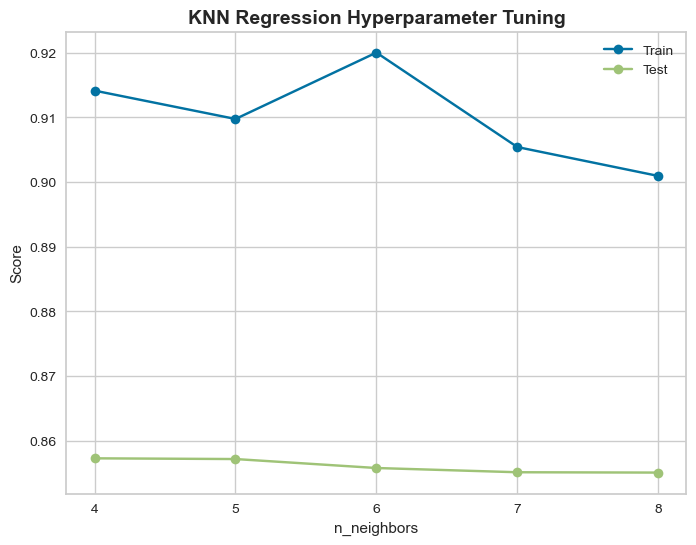

In [99]:
# Initializing the values
param_values = mean_train_scores = knnr_cv_results['param_n_neighbors'].astype(int)  
x = sorted(range(len(param_values)), key=lambda i: param_values[i])
param_values = [param_values[i] for i in x]
mean_train_scores = knnr_cv_results['mean_train_score'].astype(float)  
mean_test_scores = knnr_cv_results['mean_test_score'].astype(float)  

# Create the size for the figure
plt.figure(figsize=(8, 6))

# Plotting the Train and Test Scores
plt.plot(param_values, mean_train_scores, label='Train', marker='o')
plt.plot(param_values, mean_test_scores, label='Test', marker='o')

plt.xticks(param_values)  # Set values for x ticks

# Adding labels and legend to the plot
plt.xlabel('n_neighbors')
plt.ylabel('Score')

# Adding title to the plot
plt.title('KNN Regression Hyperparameter Tuning', fontweight='bold', fontsize=14)

# Adding legend to the plot
plt.legend()

# Displaying the plot
plt.show()

<b>Observation(s):</b>

* Although the nearest distance in between train and test split is of `K` should've been set to 6, but the distance  would've been the farthest in between them. So, the next appropriate value of k which also balances the differences in between the scores and also have a respectable accuracy score is set to 5.

Applying the `KNN Regressor` with the updated values

In [100]:
# Extracting the best estimator
kn_value = knnr_cv.best_params_['n_neighbors']

In [101]:
# For accuracy scores, fitting the dataset and obtaining the scores
knnr = KNeighborsRegressor(n_neighbors=kn_value)
knnr.fit(X_train_scaled, y_train)

# Accuracy scores of the traning and testing in the dataset
knn_train_Score = knnr.score(X_train_scaled, y_train); knn_Test_Score = knnr.score(X_test_scaled, y_test);
print('Best KNN Regression Train Score is: ', knn_train_Score); print('Best KNN Regression Test Score is: ', knn_Test_Score)

Best KNN Regression Train Score is:  0.914071003960354
Best KNN Regression Test Score is:  0.8748839111978068


<b>Observation(s):</b>

* The significant improvement in scores of Train and Test proves the successful implementation of not only the model, but also `GridSearchCV` and `Rank` algorithms improved the scores further.

#### <b>ii. Decision Tree Regressor</b>

As the training and testing datasets are already split and rescaled, an instance of decision tree regressor will be initiated, fitted and accuracy scores will be analyzed before it can be processed through the usual `GridSearchCV` and `Rank` functions.

In [102]:
# Initializing the maximum depth of the tree
depth = 2

In [103]:
# Creating the decision tree regressor instance and fitting the model
dtr = DecisionTreeRegressor(max_depth=depth, random_state=rs)
dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=2, random_state=5)

In [104]:
# Accuracy scores of the traning and testing in the dataset
dtr_train_Score = dtr.score(X_train_scaled, y_train); dtr_Test_Score = dtr.score(X_test_scaled, y_test);
print('Decision Tree Regression Train Score is: ', dtr_train_Score); print('Decision Tree Regression Test Score is: ', dtr_Test_Score)

Decision Tree Regression Train Score is:  0.7470835799044246
Decision Tree Regression Test Score is:  0.6291818309704147


Improving on the Model via `GridSearch`

* A List of `max_depth` values will be created and stored in a variable called `param_grid`.
* Best parameter(s) for the decision tree regressor are calculated like above through `GridSearchCV` and `Rank` functions / algorithms and are displayed for easy reference alogn with a line plot as well
* The parameters are then fitted, accuracy displayed and related visualzations are then plotted to show whether the implementation was in accordance of the requirement or not.

In [105]:
# For finding the best fit for the decision tree regressor, a list of max_depth values are created
param_grid = {'max_depth': np.arange(1,21)}

In [106]:
# Instantiating GridSearchCV
dtr_cv = GridSearchCV(DecisionTreeRegressor(random_state=rs), param_grid, cv=5, return_train_score=True)

# Fitting the model
dtr_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=5),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             return_train_score=True)

In [107]:
# Ranking the scores by the best score
dtr_cv_results = pd.DataFrame(dtr_cv.cv_results_).sort_values(by='rank_test_score')
dtr_cv_results = dtr_cv_results[['param_max_depth', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(5).reset_index(drop=True)
dtr_cv_results

param_max_depth  mean_train_score  std_train_score  mean_test_score  \
0              16          0.999384         0.000393         0.818385   
1              18          0.999864         0.000032         0.813668   
2               7          0.971116         0.003174         0.812807   
3              17          0.999718         0.000109         0.811066   
4              14          0.998304         0.000772         0.808012   

   std_test_score  rank_test_score  
0        0.062118                1  
1        0.062436                2  
2        0.052411                3  
3        0.063664                4  
4        0.068161                5

In [108]:
# Printing the best parameters and the best score
print("Tuned Decision Tree Regression Parameter: {}".format(dtr_cv.best_params_))

Tuned Decision Tree Regression Parameter: {'max_depth': 16}


In [109]:
# Sorting the param_values according the index value of the sorted param_values.
param_values = mean_train_scores = dtr_cv_results['param_max_depth'].astype(int)
x = sorted(range(len(param_values)), key=lambda i: param_values[i])
param_values = [param_values[i] for i in x]

mean_train_scores = dtr_cv_results['mean_train_score'].astype(float)
mean_test_scores = dtr_cv_results['mean_test_score'].astype(float)

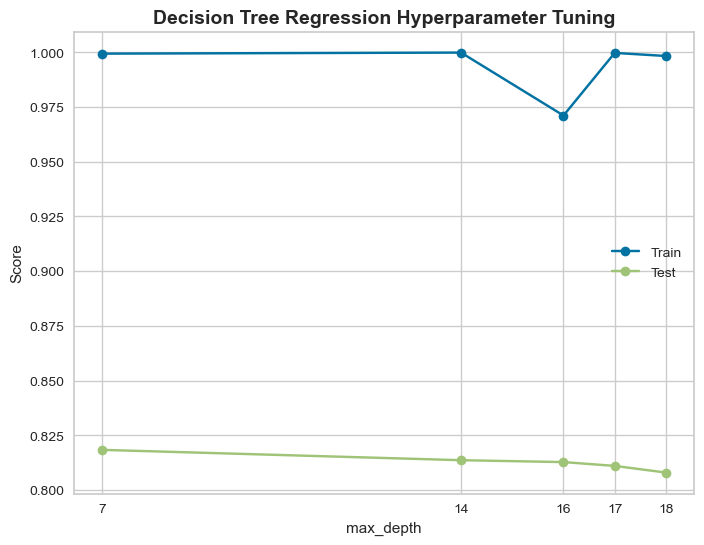

In [110]:
# Creating Figure Size
plt.figure(figsize=(8,6))

# Plotting the Train and Test Scores
plt.plot(param_values, mean_train_scores, label='Train', marker='o')
plt.plot(param_values, mean_test_scores, label='Test', marker='o')

plt.xticks(param_values)  

# Adding labels and legend to the plot
plt.xlabel('max_depth')
plt.ylabel('Score')

# Adding title to the plot
plt.title('Decision Tree Regression Hyperparameter Tuning', fontweight='bold', fontsize=14)

# Adding legend to the plot
plt.legend()

# Displaying the plot
plt.show()

In [111]:
# Extracting the best value and then fitting the model
depth = dtr_cv.best_params_['max_depth']

dtr = DecisionTreeRegressor(max_depth=depth, random_state=rs)
dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=16, random_state=5)

In [112]:
# Plotting the text representation of the decision tree
plt.figure(figsize=(20,10))
tree_text = export_text(dtr, feature_names=list(X_train.columns))
print(tree_text)


|--- price_category <= 1.22
|   |--- price_category <= -0.34
|   |   |--- year_of_registration <= -0.69
|   |   |   |--- standard_make <= 0.04
|   |   |   |   |--- year_of_registration <= -1.18
|   |   |   |   |   |--- standard_model <= -0.45
|   |   |   |   |   |   |--- mileage <= 0.80
|   |   |   |   |   |   |   |--- standard_model <= -0.46
|   |   |   |   |   |   |   |   |--- body_type <= -0.89
|   |   |   |   |   |   |   |   |   |--- year_of_registration <= -1.68
|   |   |   |   |   |   |   |   |   |   |--- mileage <= -0.14
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- mileage >  -0.14
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- year_of_registration >  -1.68
|   |   |   |   |   |   |   |   |   |   |--- standard_model <= -0.57
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |

<Figure size 2000x1000 with 0 Axes>

In [113]:
# Accuracy scores of the training and testing in the dataset
dtr_train_Score = dtr.score(X_train_scaled, y_train); dtr_Test_Score = dtr.score(X_test_scaled, y_test);
print('Decision Tree Regression Train Score is: ', dtr_train_Score); print('Decision Tree Regression Test Score is: ', dtr_Test_Score)

Decision Tree Regression Train Score is:  0.9995553079829906
Decision Tree Regression Test Score is:  0.8346250419305771


<b>Observation(s):</b>

* Previously, the training and testing scores were abysmal, but the significant improvements prove the successful implementation of not only of the model, but also `GridSearchCV` and `Rank` algorithms for the AutoTrader dataset which was provided by the employer.

#### <b>iii. Linear Regression</b>

All of the steps involving splitting, scaling, and fitting the data are done in the previous steps. So, for now, we will just be fitting the model and obtaining the scores. We will will not have the luxury of plotting lines or surfaces anymore, but it is the same principle - intercept and slopes (coefficients) associated with each feature.

In [114]:
# Creating an instance of the Linear Regression Model
lr = LinearRegression()

# Fitting the model
lr.fit(X_train_scaled, y_train)

# Accuracy scores of the traning and testing in the dataset
lr_train_Score = lr.score(X_train_scaled, y_train); lr_Test_Score = lr.score(X_test_scaled, y_test);

In [115]:
# Displaying the scores
print('Linear Regression Train Score is: {}'.format(lr_train_Score)); print('Linear Regression Test Score is: {}'.format(lr_Test_Score))

Linear Regression Train Score is: 0.8402123114855913
Linear Regression Test Score is: 0.8242438320253085


Improving on the Model via `GridSearch`

For increase in the train and test scores, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html" target="_blank">Ridge</a> function will be used in Grid Search:

* Along with `fit_intercept`, a List of `alpha` values will be created and stored in a variable called `param_grid`.
* Best parameter combination(s) regarding alpha and fit_intercept for the linear regression will be extracted from the list. 
* The parameters will be then fitted, refitted, and the updated values are displayed to analyze whether the implementation made a change or not.

In [116]:
# Declaring parameters for the ridge regularization
param_grid = {'fit_intercept': [True, False], 'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}  # Alpha values are the regularization values
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)
ridge_cv.fit(X_train_scaled, y_train)

# Print grid search results
lr_cv_results = pd.DataFrame(ridge_cv.cv_results_).sort_values(by='rank_test_score')
lr_cv_results = lr_cv_results[['params','mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(5).reset_index(drop=True)
print(lr_cv_results)

# Extract best parameters
best_params = ridge_cv.best_params_
fit_intercept = best_params['fit_intercept']
alpha = best_params['alpha']

# Fit final model with best parameters
ridge = Ridge(fit_intercept=fit_intercept, alpha=alpha)
ridge.fit(X_train_scaled, y_train)

# Evaluate model performance
ridge_train_Score = ridge.score(X_train_scaled, y_train)
ridge_Test_Score = ridge.score(X_test_scaled, y_test)
print('Linear Regression Train Score is:', ridge_train_Score)
print('Linear Regression Test Score is:', ridge_Test_Score)

                                  params  mean_train_score  std_train_score  \
0  {'alpha': 100, 'fit_intercept': True}          0.842183         0.003377   
1   {'alpha': 55, 'fit_intercept': True}          0.842342         0.003373   
2   {'alpha': 50, 'fit_intercept': True}          0.842355         0.003373   
3   {'alpha': 45, 'fit_intercept': True}          0.842367         0.003373   
4   {'alpha': 40, 'fit_intercept': True}          0.842377         0.003372   

   mean_test_score  std_test_score  rank_test_score  
0         0.825919        0.019323                1  
1         0.825456        0.018616                2  
2         0.825397        0.018539                3  
3         0.825336        0.018463                4  
4         0.825273        0.018387                5  
Linear Regression Train Score is: 0.8400572053245074
Linear Regression Test Score is: 0.8263666607153445


In [117]:
# Applying the best parameters to lr which is our main model
lr = Ridge(fit_intercept=fit_intercept, alpha=alpha)
lr.fit(X_train_scaled, y_train)

# Accuracy scores of the training and testing in the dataset
lr_train_Score = lr.score(X_train_scaled, y_train); lr_Test_Score = lr.score(X_test_scaled, y_test);

# Displaying the scores
print('Linear Regression Train Score is: {}'.format(lr_train_Score)); print('Linear Regression Test Score is: {}'.format(lr_Test_Score))

Linear Regression Train Score is: 0.8400572053245074
Linear Regression Test Score is: 0.8263666607153445


<b>Observation(s):</b>

* Before applying Ridge,<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html" target="_blank">Lasso</a> was tried to increase the score, but it did not show a major difference in the accuracy percentage(s). However, Ridge showed an increase of one percent for Target variable only. 

#### <b>b. Comparison of All the Three Model Performances</b>

Before evaluating the in-depth performance of the machine learning models seperately, the accuracy of the three models will be visualized to know how they have fared in between each other. 

                    Models  Train Scores  Test Scores
0            KNN Regressor      0.914071     0.874884
1  Decision Tree Regressor      0.999555     0.834625
2        Linear Regression      0.840057     0.826367


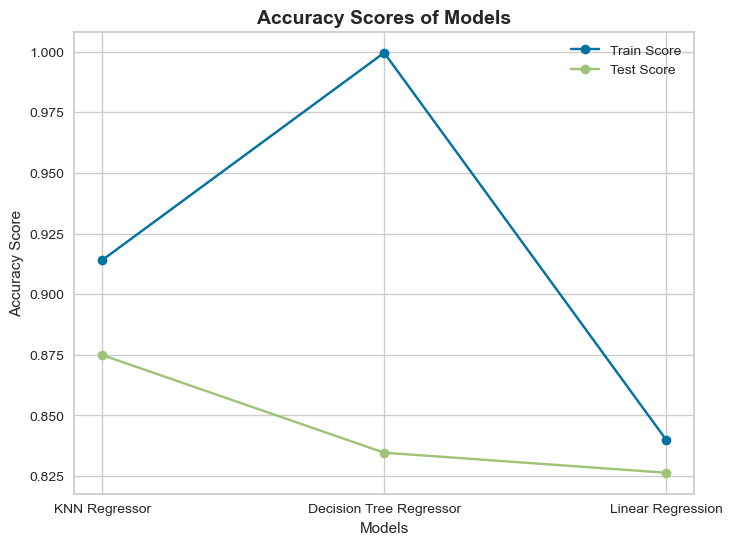

In [118]:
# Creating a list of models and list of accuracy scores or train and test data
models = ['KNN Regressor', 'Decision Tree Regressor', 'Linear Regression']
train_scores = [knn_train_Score, dtr_train_Score, lr_train_Score]
test_scores = [knn_Test_Score, dtr_Test_Score, lr_Test_Score]

# Displaying the scores in a dataframe
accuracy_scores_df = pd.DataFrame({'Models': models, 'Train Scores': train_scores, 'Test Scores': test_scores})
print(accuracy_scores_df)

# Adjusting the figure size
plt.figure(figsize=(8,6))

# Plotting the accuracy scores of train and test data
plt.plot(models, train_scores, label='Train Score', marker='o')
plt.plot(models, test_scores, label='Test Score', marker='o')

# Adding the axis labels on the plot
plt.xticks(models)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Adding title to the plot
plt.title('Accuracy Scores of Models', fontweight='bold', fontsize=14)

# Adding legend to the plot
plt.legend()

# Displaying the plot
plt.show()

<b>Observation(s):</b>

* Regarding the performance of predicting price of the vehicle, it can be observed that `KNN Regressor` not only has much better performance but also the distance between the train and test dataset is small. `Decision Tree Regressor` also performed better but the difference between the test and train scores were the highest. On the contrary, accuracy distance of `Linear Regression` in between them were the least and the accuracy was also the least amongst all the models, but still they are still more than acceptible when one considers the size, complexity, and multi-dimensionality of the dataset.

### <b>4. Model Evaluation & Analysis:</b>

In this section, all three of the algorithms will be evaluated and analysed through different metrics and visualization, followed by some views about feature importance, and related aspects. 

Firstly, `coarse-grained analysis` will be considered, which refers to high-level / broad assessment for understanding the performance of the model by evaluating it in a number of ways. For this, `Cross-Validation Scores (K-Fold)` will train the data on multiple folds of data, and it gives a reliable estimate of how it will perform on test data. Moreover, `Mean Absolute Error` will measure errors between observations expressing the same phenomenon. Moreover, `Actual vs Predicted Plot` will visualize the relationship between actual and predicted values, revealing patterns in the in model errors and biases.

Secondly, for gaining and discussing insights based on `feature importance`, relevant functions' built-in models will be used, except for KNN Regressor where `Permutation Importance` will be utilized to calcuate the most impactful features on the dataset for prediction purposes.

Finally, `fine-grained analysis` will be carried out where primarily `Residuals` will be calculated which is the difference between observed and predicted values of data in a dataset. This function will also ealuate the performance of all the models.

#### <b>a. KNN Regression</b>

##### <b>i. Score / Loss Metrics through Cross-Validation</b>

For analysis of score / loss metric, K-Fold and Mean Absolute Error will be calculated and analyzed.

Scores for Each Fold: [0.84297133 0.82966303 0.87309481 0.80197027 0.93869586]
Average CV:  0.8572790598381215
Mean Absolute Error: 2070.99787622366


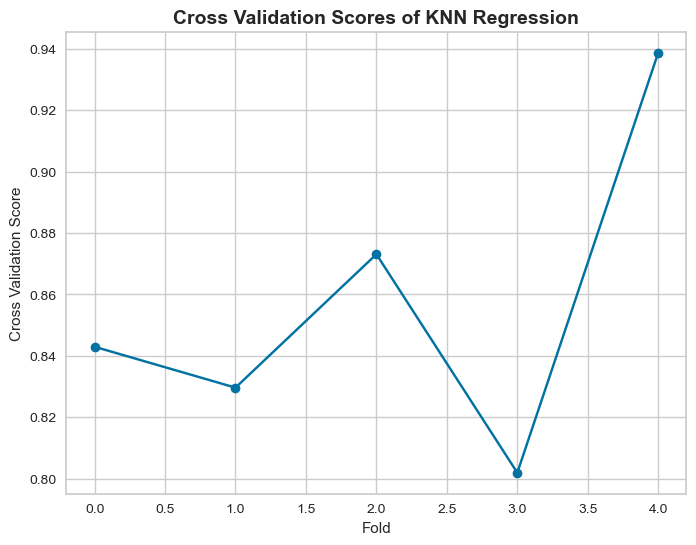

In [119]:
# Applying Related Cross Validation function to the KNN Regression Model
cv_scores = cross_val_score(knnr, X_train_scaled, y_train, cv=5)

# Displaying the scores
print('Scores for Each Fold:', cv_scores)
print('Average CV: ', cv_scores.mean())

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_train,knnr.predict(X_train_scaled))

# Displaying the Mean Squared Error
print('Mean Absolute Error:', mae)

# Line plot of the cross validation scores
plt.figure(figsize=(8,6))
plt.plot(cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Cross Validation Score')
plt.title('Cross Validation Scores of KNN Regression', fontweight='bold', fontsize=14)
plt.show()

<b>Observation(s):</b>

* Cross-Validation K-Fold : After analyzing the multiple accuracy scores through five folds and taking mean of the means, it is to be proved that the model and dataset are compatible with each other and have no issues whatsoever.

* Mean Absolute Error: One of the prime reason for a relatively high value is that I have retained the entries of all the cars after taking approval from the client, irrespective of the number of observations. It means that if there is only one observation of a partciular car, then instead of declaring it an outlier and removing it before applying a model, I have considered them as a legitimate data point so that it can be future proof as more and more dataset is trained on it to make the dataset more accurate. 

##### <b>ii. Actual vs Predicted Plot Analysis</b>

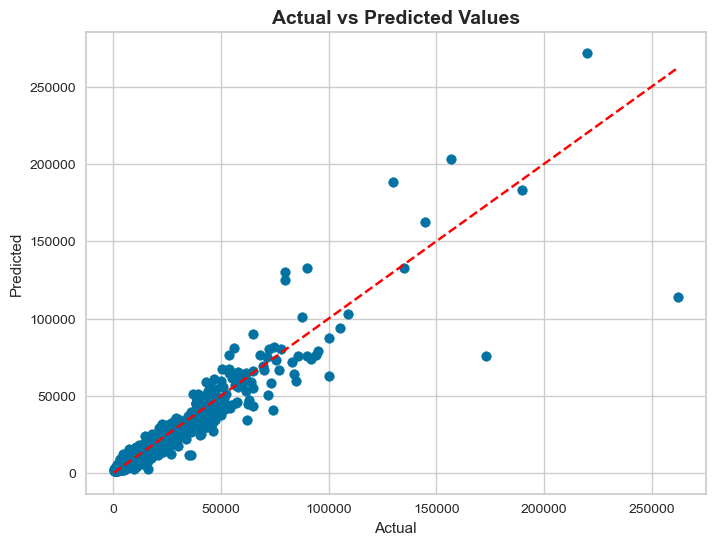

In [120]:
# Predicting the values
y_pred = knnr.predict(X_test_scaled)

# Creating a DataFrame of actual and predicted values
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting the actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values', fontweight='bold', fontsize=14)
plt.show()


<b>Observation(s):</b>

* For KNN regression model, the accuracies are really good for test dataset, considering the size of the dataset, complexity, data types, and multi-dimensions of the features. The excellent performance is also reflected in the plot above.

##### <b>iii. Gain and Discuss Insights Based on Feature Importance</b>

Unfortunately, KNN Regressors does not have a native feature importance calculation like other algorithms. So, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html" target="_blank">permutation_importance</a>, an alternate function in sklearn is utilized which calculates feature importance scores for any model by checking the impact of shuffling individual features on the model performance. 

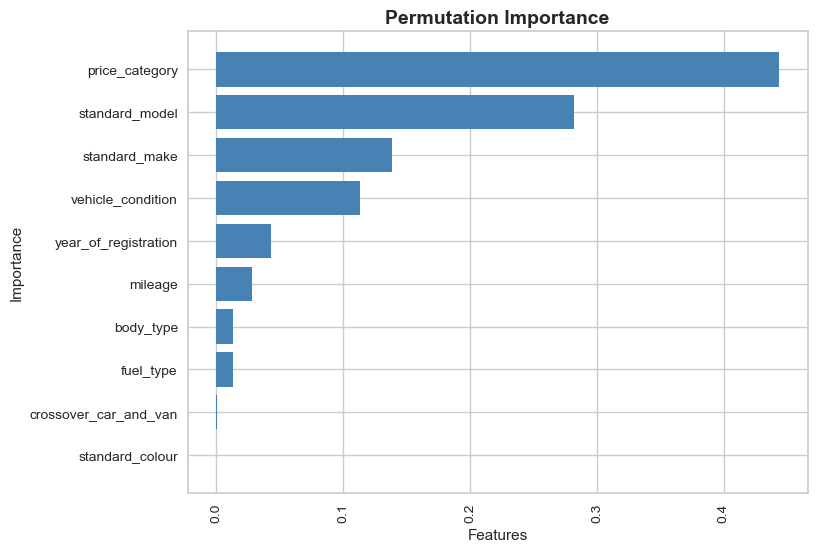

In [121]:
# Calculating permutation importance
p_importance = permutation_importance(knnr, X_test_scaled, y_test)

# Creating a DataFrame of feature names and permutation importance
df_perm_importance = pd.DataFrame({'feature': X.columns.tolist(), 'importance': p_importance.importances_mean})

# Sorting the DataFrame in descending order of importance
df_perm_importance.sort_values(by='importance', ascending=True, inplace=True)

# Deleting the row at 0 index
df_perm_importance.drop(0, inplace=True)

# Plotting the permutation importance
plt.figure(figsize=(8, 6))
plt.barh(df_perm_importance['feature'], df_perm_importance['importance'], color='steelblue')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance', fontweight='bold', fontsize=14)
plt.show()


<b>Observation(s):</b>

* As per the permutation importance feature displayed above, `price_category` is the first feature which is the most important regarding the dataset because price specific categories based on the real world data makes it easier for the model to predict them conveniently and with higher precission. Furthermore, on second and third place, `standard_model`, and `vehicle_condition` are placed because generally model of any automobile manufacturer represent a category of customers with different price points, and categorization of used and new cars based on the requirements by AutoTrader also makes it easier for the model to predict the prices as per the standards of the employer. 

##### <b>iv. Analysis of Individual Predictions and Distribution of Scores/Losses Together with Predictors</b>

* For analysis of individual predictions, the accuracies of train and test model in the plot above shows that most of the dataset is predicted correctly, even though the dataset is large, complex, and has several dimensions.

* For distributions of scores / losses, residuals can be calculated and plotted so that the spread and central tendency of it can be analyzed.

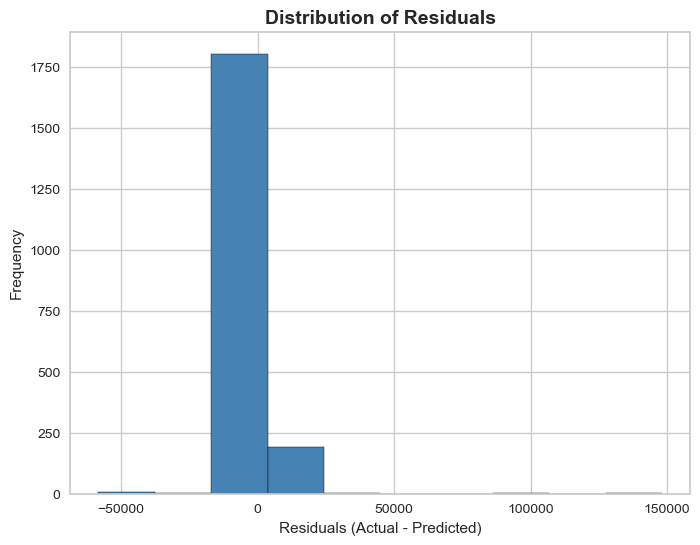

In [122]:
# Calculate the residuals
y_pred = knnr.predict(X_test_scaled)
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(8, 6))
ax = plt.hist(residuals, bins=10, edgecolor='black', color='steelblue')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals', fontweight='bold', fontsize=14)
plt.show()


* According to the histogram, it clarifies the excellent performance of the KNN regressor on the dataset, even after it's complexity. It forms a normal distribution where most of the values cluster around zero, with few number of instances of of large positive or negative residuals. 

##### <b>v. If KNN is an Interpretable Model, Briefly Discuss About its Structure</b>

KNN is generally considered to be a non-interpretable model, which means that the internal structure of the model is difficult to understand. There are quite a few reasons to support this notion:

* KNN is an algorithm that operates on instances, meaning that instead of learning some rules or parameters from the data, it just memorizes the entire training dataset. That memorization is then utilised to create predictions baed on the similarity between the input instance and also of training data.
* KNN doesn't create a model or set of rules that can be easily understood by the data scientist. Instead, the decision boundries are created by the model instead on the distribution of the data points in the feature space.
* The model make predictons based on the nearest neghbors of the dataset. It means that the decision is based on the majority class or average value of the closest data points. That's why it is unable to give a understanding of the global patterns in the data.
* Lastly, KNN relies on distance metrics (Euclidean distance). The impact of specific distance metrics are hard to interpret, especially in dataset having high-dimensions, like the one which was analyzed for this assessment.

### <b>b. Decision Tree Regressor</b>

##### <b>i. Score / Loss Metrics through Cross-Validation</b>

For analysis of score / loss metric, K-Fold and Mean Absolute Error will be calculated and analyzed.

Scores for Each Fold: [0.85781427 0.69745594 0.86348626 0.82212891 0.8510394 ]
Average CV:  0.8183849560196492
Mean Absolute Error: 176.25813432252468


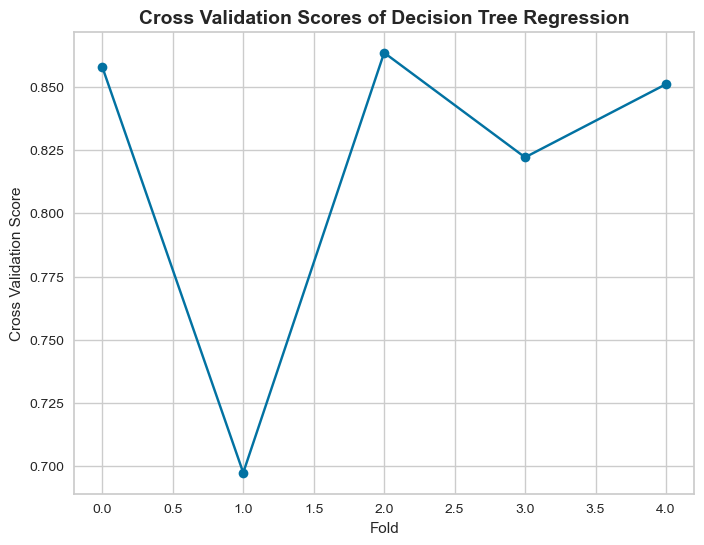

In [123]:
# Applying Related Cross Validation function to the DT Regression Model
cv_scores = cross_val_score(dtr, X_train_scaled, y_train, cv=5)

# Displaying the scores
print('Scores for Each Fold:', cv_scores)
print('Average CV: ', cv_scores.mean())

# Calculating Mean Squared Error
mae = mean_absolute_error(y_train,dtr.predict(X_train_scaled))

# Displaying the Mean Squared Error
print('Mean Absolute Error:', mae)

# Line plot of the cross validation scores
plt.figure(figsize=(8,6))
plt.plot(cv_scores, marker='o')

# Adding the axis labels on the plot
plt.xlabel('Fold')
plt.ylabel('Cross Validation Score')

# Adding title to the plot
plt.title('Cross Validation Scores of Decision Tree Regression', fontweight='bold', fontsize=14)

# Displaying the plot
plt.show()

<b>Observation(s):</b>

* k-Fold Cross-Validation : Multiple instances of the K-Fold CV was executed to make sure if the accuracy is according to the client's requirements or not. Fortunately, all of the values and even the value of mean suggests that the model and dataset are compatible with each other and have no issues whatsoever.

* Mean Absolute Error: Just like for the case of KNN Regressor, Mean Absolute Error value is little bit high because the values have been retained of all the cars after taking approval from the client, irrespective of the number of observations. It means that if there is only one observation of a partciular car, then instead of declaring it an outlier and removing it before applying a model, I have considered it as a legitimate data point so that it can be future proof as more and more dataset is trained on it to make the dataset more accurate. This analysis related to the score can be proved by the actual vs predicted scatter plot and distributions of residuals diagram.

##### <b>ii. Actual vs Predicted Plot Analysis</b>

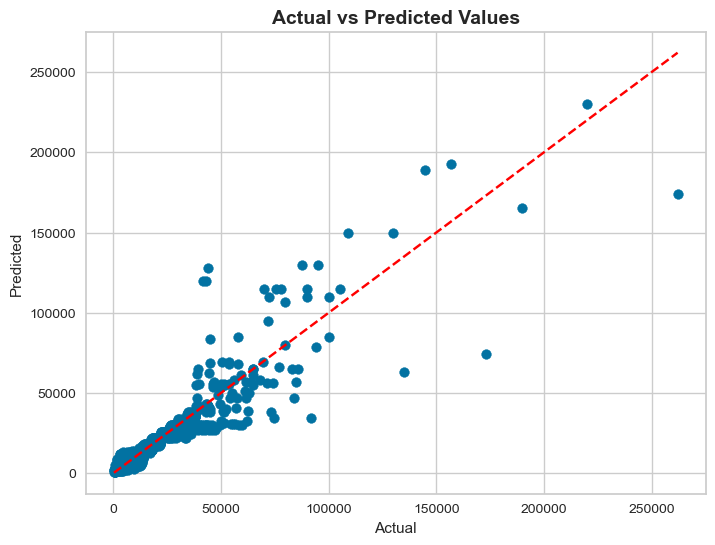

In [124]:
# Predicting the values
y_pred = dtr.predict(X_test_scaled)

# Creating a DataFrame of actual and predicted values
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Setting the figure size
plt.figure(figsize=(8,6))

# Plotting the actual and predicted values
plt.scatter(y_test, y_pred, marker = 'o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values', fontweight='bold', fontsize=14)
plt.show()

<b>Observation(s):</b>

* For Decision Tree Regression, the accuracies for both the train and test dataset mentioned before are further validated with the plot displayed above and it verifies the excellent performance of the model, specially when we consider the size of the dataset, complexity, data types, and multi-dimensions of the features.

##### <b>iii. Gain and Discuss Insights Based on Feature Importance</b>

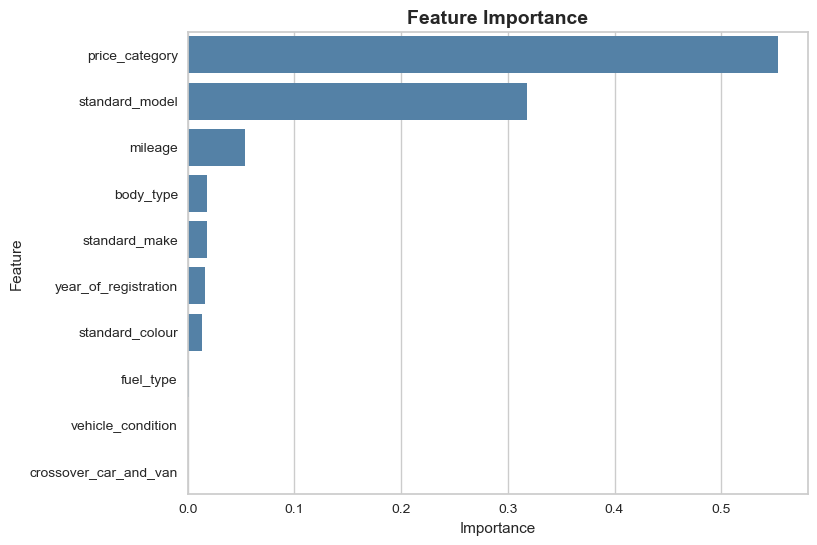

In [125]:
# For decision tree regressor, calculating the feature importance
dtr_importance = dtr.feature_importances_

# Creating a DataFrame of feature importance
dtr_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dtr_importance})

# Sorting the DataFrame in descending order of feature importance
dtr_feature_importance.sort_values(by='importance', ascending=False, inplace=True)

#Delete the row at 0 index
dtr_feature_importance.drop(0, inplace=True)

# Plotting the feature importance
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=dtr_feature_importance, color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance', fontweight='bold', fontsize=14)
plt.show()


<b>Observation(s):</b>

* Regarding Decision Tree Regressor, `price_category` is again on top of the list due to the categorization of price points based on the real world data which was applied due to feature engineering. On the second place, `standard_model` is again one of the most important feature because as mentioned before, manufacturers around the world use model names to target cars specific to customers having unique needs and budget. On the third place, `mileage` is also a universal feature which effects the price of the vehicle because the higer mileage numbers effect the price of the vehicle negatively because it denotes that the overall condition of the car.

##### <b>iv. Analysis of Individual Predictions and Distribution of Scores/Losses Together with Predictors</b>

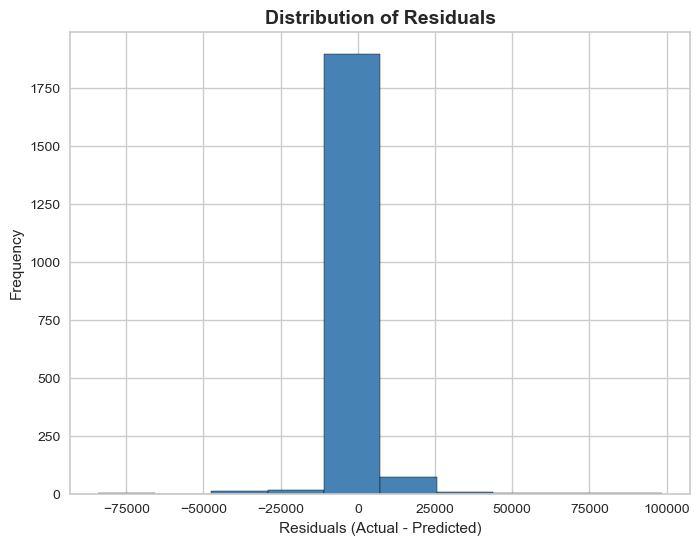

In [126]:
# For Decision Tree Regressor, calculating the residuals
y_pred = dtr.predict(X_test_scaled)
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(8,6))
ax = plt.hist(residuals, bins=10, color='steelblue', edgecolor='black')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals', fontweight='bold', fontsize=14)
plt.show()

<b>Observation(s):</b>

* For Decision Tree Regressor, not only the accuracy scores mentioned above are excellent, but also the residuals(the differences between the observed and predicted values) hover around zero. It suggests that the model is a good fit and on an average, the model is neither systematically overestimating nor underestimating the target variable. Overall, it indicates an excellent performance of the model.

##### <b>v. If Decision Tree is an Interpretable Model, Briefly Discuss About its Structure</b>

Decision tree regression is an interpretable model and it makes predictions by dividing the dataset into segments and then by assigning a constant value to each region of the dataset. 

The structure of decision tree can be described with the help of following points:

1) Nodes : There are different type of nodes which constitutes a decision tree. Firstly, root node is the top most node of the tree, which represents the entire dataset. Secondly, internal nodes are the ones which divides the data into several subsets based on the criteria and threshold. Finally, leaf nodes are the nodes which doesn't split further and provides the predicted output values.

2) Edges: Edges simply connect nodes with each other and represent the condition that was fulfilled based on the values of specific features.

3) Splits: Each internal node represents a split in the data based on a feature and a threshold.

4) Decision Criteria: This is the condition at each internal node which is based on a feature and a specific threshold.

5) Leaf Node Values: Each leaf node contains a specific output value for the subset of data that reaches the leaf.

6) Tree Depth: This is simply the path from root note till the last node. The longer the depth of a tree will mean it will be more complex and might be prone to overfitting.

7) Pruning: This terminology is pertained to decrease the size and complexity of the decision tree. It involves deleting some branches of the tree which might not be as useful to retain or increase accuracy in predicting values.

8) Interpretability: Decision tree are classified at interpretable because you can easily trace the flow and steps that were taken for any partciular output from root node to the relevant child ones. 

### <b>c. Linear Regression</b>

##### <b>i. Score / Loss Metrics through Cross-Validation</b>

For analysis of score / loss metric, K-Fold and Mean Absolute Error will be calculated and analyzed.

Scores for Each Fold: [0.80151328 0.82854524 0.81282695 0.8277806  0.8589277 ]
Average CV:  0.8259187548659804
Mean Absolute Error: 3482.578741224243


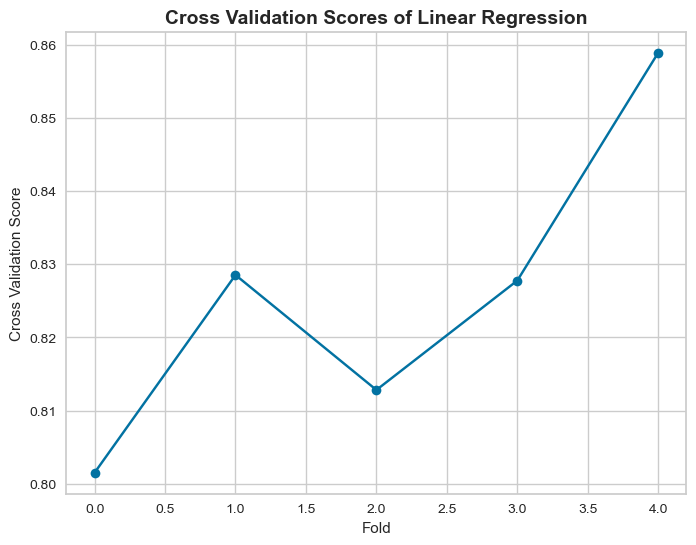

In [127]:
# Applying Related Cross Validation function to the Linear Regression Model
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)

# Displaying the scores
print('Scores for Each Fold:', cv_scores)
print('Average CV: ', cv_scores.mean())
#print ('\n')

# Calculating Mean Squared Error
mae = mean_absolute_error(y_train,lr.predict(X_train_scaled))

# Displaying the Mean Squared Error
print('Mean Absolute Error:', mae)

# Line plot of the cross validation scores
plt.figure(figsize=(8,6))
plt.plot(cv_scores, marker='o')

# Adding the axis labels on the plot
plt.xlabel('Fold')
plt.ylabel('Cross Validation Score')

# Adding title to the plot
plt.title('Cross Validation Scores of Linear Regression', fontweight='bold', fontsize=14)

# Displaying the plot
plt.show()

<b>Observation(s):</b>

* k-Fold Cross-Validation : Just like with the other two models, the accuracy of K-Fold CV is according to the client's requirements. Fortunately, all of the values and even the value of mean suggests that the model and dataset are compatible with each other and have no issues whatsoever.

* Mean Absolute Error: Just like for the case of KNN Regressor & Decision Tree Regressor, Mean Absolute Error value is also relativelyy high here as well because I have retained the entries of all the cars after taking approval from the client, irrespective of the number of observations. It means that if there is only one observation of a partciular car, then instead of declaring it an outlier and removing it before applying a model, I have considered it as a legitimate data point so that it can be future proof as more and more dataset is trained on it to make the dataset more accurate. This analysis related to the score can be proved by the actual vs predicted scatter plot and distributions of residuals diagram.

##### <b>ii. Actual vs Predicted Plot Analysis</b>

[]

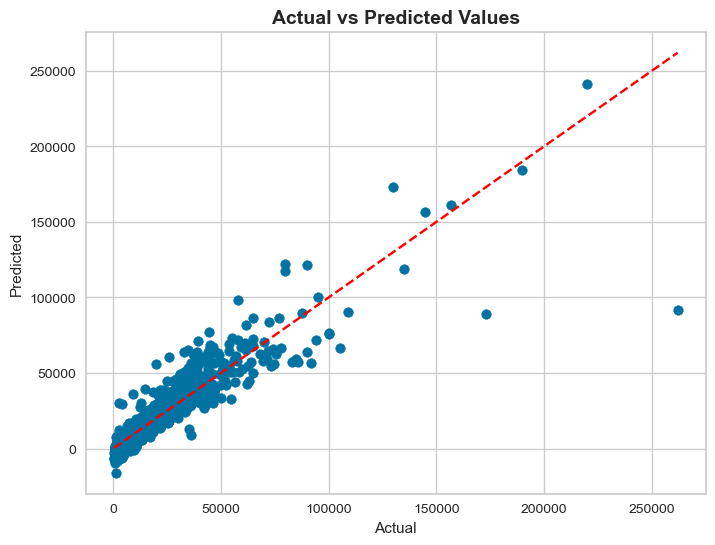

In [128]:
# plotting the linear regression

# Predicting the values
y_pred = lr.predict(X_test_scaled)

# Creating a DataFrame of actual and predicted values
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting the actual and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, marker = 'o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values', fontweight='bold', fontsize=14)
plt.plot()


<b>Observation(s):</b>

* In Linear Regression, it was already observed that the accuracy values of train and test dataset were really good, considering the size of the dataset, complexity, data types, and multi-dimensions of the features. The accuracy has been justified by this regression plot as well because it denotes that most of the values were corrected predicted and that is why they are near the regression line.

##### <b>iii. Gain and Discuss Insights Based on Feature Importance</b>

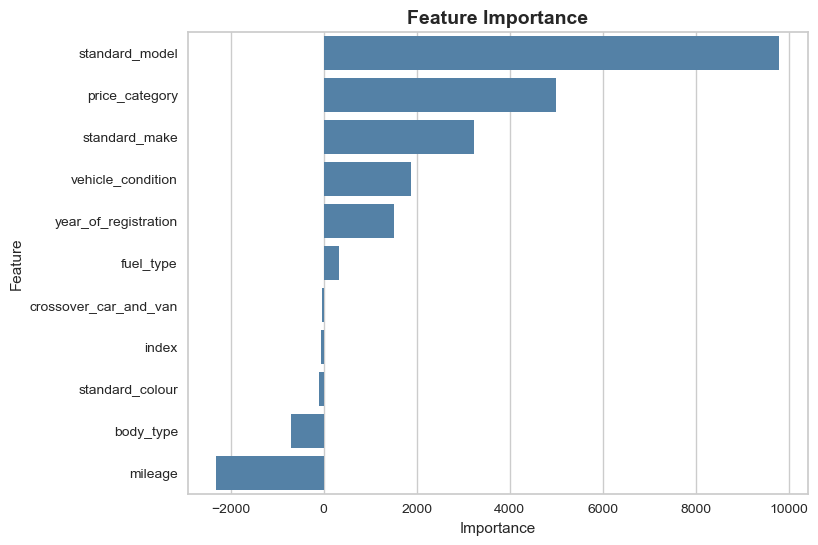

In [129]:
# For linear regression, calculating the feature importance
lr_importance = lr.coef_

# Creating a DataFrame of feature importance
lr_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': lr_importance})

# Sorting the DataFrame in descending order of feature importance
lr_feature_importance.sort_values(by='importance', ascending=False, inplace=True)

# Plotting the feature importance
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=lr_feature_importance, color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance', fontweight='bold', fontsize=14)
plt.show()



<b>Observation(s):</b>

* For linear regression, the importance of features are not that much different from the other models explained earlier. `standard_model` is again amongst the top feature which contribted in the success of the model because manufacturers launch different models of their cars to attract customers of different needs and budgets. Secondly, `price_category` is another feature which is ranked high because it plays a vital role in segregating prices into different segments based on real-world data and it made the accuracy of the model higher. Lastly, `vehicle_condition` is an obvious top feature for prediction because it segregates the vehicles at AutoTrader in NEW and USED via their own algorithms and it also contributed in higher accuracy of the model.  

##### <b>iv. Analysis of Individual Predictions and Distribution of Scores/Losses Together with Predictors</b>

* For analysis of individual predictions, the accuracies of train and test model in the plot above shows that most of the dataset is predicted correctly, even though the dataset is large, complex, and has several dimensions.

* For distributions of scores / losses, a residuals plot will be used here which will not only show a normal distribution plot for the residuals but also visualize the performance of train and test dataset. This plot is generally used by Data Scientists all over the world to analyze whether model fulfills the requirements pertaining to the performance or not.

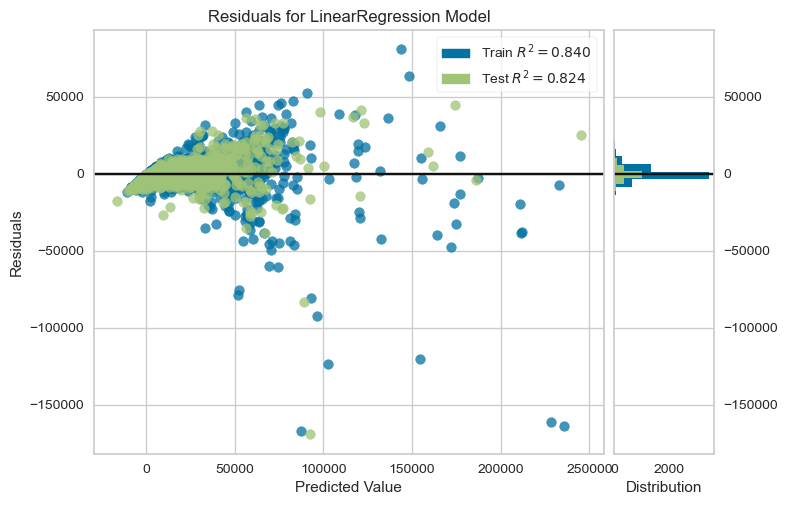

In [130]:
# Initiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

# Plotting the graph
visualizer.fit(X_train_scaled, y_train)  
visualizer.score(X_test_scaled, y_test)  
visualizer.show()   ;              

<b>Observation(s):</b>

* The residuals (difference between the acutal values of the dependent variable and the values predicted by the model) of the linear regression model confirms that the maojrity of the residuals are indeed close to zero, which is a good indication that the model is a good fit on the model.

* Regarding distributon of the residuals, most of the values are around zero and forms a normal distribution. Such distributions are known as ideal distributon and it further solidifies the notion that the model is a good fit on the dataset.

* R-squared (coefficient of determination) score is calculated to specify the goodness of the fit of the underlying regression model to the test data. The value of 0.82+ for both train and test dataset implies that approximately 85% of the variance in the target variable is explained by the independent variables in the linear regression model. This is a good enough score to prove that the model syncrhonizes with the dataset.

##### <b>v. If Linear Regression is an Interpretable Model, Briefly Discuss About its Structure</b>

Linear regression is a straightforward model and it can be describe through these points:

1) Relationship: Linear regression models the relationship between a target / dependent variable (price) and one or more independent variable (mileage)

2) Intercept & Coefficients: The model has an intercept which is a predicted value where all indepent variable will be zero. Each of the independent variable has a coefficient, indicating how much a predicted value changes when that variable changes by one unit.

3) Predictions: The method is to multiply each independent variable by its coefficient, add them up, and then add the intercept. The result gives the approx value of the dependent variable.

4) Coefficient Interpretation: A positive value means an increase in the independent variable is associated with an increase with the target variable, and same will go for negative coefficient.

5) Assumptions: This model assumes that the relationship between all variables is linear, the errors are independent, and have constant variance, and also the errors are normally distributed.

6) Residuals: This value is the difference between the actual and predicted values. Residuals helps a data scientist to assess how well the model fits the data.

7) R-Squared: The R-Squared value represents the proportion of variability in the dependent variable explained by the model. Furthermore, it should be noted that a higher r-squared value means a better fit.